# Spotify 1 Million Tracks - Exploração de Dados

### Descrição

... Alterar

### Os Dados

... Atualizar

Audio Features:

- **Popularity** - popularidade da música (0 a 100);
- **Year** - ano de lançamento (2000 até 2023);
- **Danceability** - se a música é adequada para dançar (0.0 a 1.0);
- **Energy** - uma medição perceptual da intensidade e atividade da música (0.0 a 1.0);
- **Key** - a tonalidade da música (-1 a 11): -1 no key detected;
- **Loudness** - intensidade da música em decibeis (-60 até 0 dB);
- **Mode** - modalidade da música (0 - Menor ou 1 - Maior);
- **Speechiness** - a presença de fala na música;
- **Acousticness** - medida de confiança (0 a 1) em saber se a música é acústica;
- **Instrumentalness** - se a música contém vocais (0 a 1);
- **Liveness** - presença de público na gravação da música (0 a 1);
- **Valence** - positividade musical (0 a 1);
- **Tempo** - o tempo da música em batimentos por minuto(BPM);
- **Time_signature** - assinatura do tempo de uma música (3 a 7);
- **Duration_ms** - duração em milissegundos.

## Importar bibliotecas

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from scipy import stats
%matplotlib inline

# Para visualizar os valores com cinco casas decimais
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Compreender os dados

Carregar o dataset

In [196]:
data = pd.read_csv('data.csv')

Visualizar features do problema

In [197]:
data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

Informações sobre valores nulos e tipos de dados de cada coluna

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

Analyse distinct values for 'track_id' and 'Unnamed: 0' fields

In [199]:
data["id"].value_counts()

id
6KbQ3uYMLKb5jDxLF7wYDD    1
1wbM7WXEKWPxqwFg3iR6BU    1
7e3KM7NU4FMdfSKolIJtMI    1
1pPrO5Lcx9UXNebcloGeHE    1
0XFfzuPe33FeLDRybwwYhd    1
                         ..
102yVwuDzXJ8R7bbA5zIG7    1
106dYCMIYBfdFhJMbWTEr2    1
10KlzvuaAH7p2LDWYbl4ph    1
10MqlNJk9H3a6vDN0BzBj7    1
60RFlt48hm0l4Fu0JoccOl    1
Name: count, Length: 169909, dtype: int64

Os valores são todos distintos, logo devemos remover esta coluna do dataset

In [200]:
data.drop("id", axis=1, inplace=True)

In [201]:
data["name"].value_counts()

name
Summertime                                              62
Overture                                                43
Home                                                    40
Stay                                                    34
You                                                     33
                                                        ..
Are We Going Down                                        1
The Century of the Common Man                            1
El Noveno Mandamiento - Instrumental (Remasterizado)     1
É Ôro Só (Ponto de Exu)                                  1
How Would I Know                                         1
Name: count, Length: 132940, dtype: int64

Apresentação de valores médios, quartis, mediana, mínimo, máximo, etc de cada coluna

In [202]:
data.describe()

acousticness   danceability   duration_ms         energy  \
count  169909.000000  169909.000000  1.699090e+05  169909.000000   
mean        0.493214       0.538150  2.314062e+05       0.488593   
std         0.376627       0.175346  1.213219e+05       0.267390   
min         0.000000       0.000000  5.108000e+03       0.000000   
25%         0.094500       0.417000  1.710400e+05       0.263000   
50%         0.492000       0.548000  2.086000e+05       0.481000   
75%         0.888000       0.667000  2.629600e+05       0.710000   
max         0.996000       0.988000  5.403500e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  169909.000000     169909.000000  169909.000000  169909.000000   
mean        0.084863          0.161937       5.200519       0.206690   
std         0.278679          0.309329       3.515257       0.176796   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.098400   
50%         0.000000          0.000204       5.000000       0.135000   
75%         0.000000          0.086800       8.000000       0.263000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode     popularity    speechiness  \
count  169909.000000  169909.000000  169909.000000  169909.000000   
mean      -11.370289       0.708556      31.556610       0.094058   
std         5.666765       0.454429      21.582614       0.149937   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.470000       0.000000      12.000000       0.034900   
50%       -10.474000       1.000000      33.000000       0.045000   
75%        -7.118000       1.000000      48.000000       0.075400   
max         3.855000       1.000000     100.000000       0.969000   

               tempo        valence           year  
count  169909.000000  169909.000000  169909.000000  
mean      116.948017       0.532095    1977.223231  
std        30.726937       0.262408      25.593168  
min         0.000000       0.000000    1921.000000  
25%        93.516000       0.322000    1957.000000  
50%       114.778000       0.544000    1978.000000  
75%       135.712000       0.749000    1999.000000  
max       244.091000       1.000000    2020.000000

Apresentação dos primeiros registos do dataset

In [203]:
data.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit  instrumentalness  key  liveness  loudness  \
0       158648  0.1950         0             0.563   10    0.1510   -12.428   
1       282133  0.0135         0             0.901    8    0.0763   -28.454   
2       104300  0.2200         0             0.000    5    0.1190   -19.924   
3       180760  0.1300         0             0.887    1    0.1110   -14.734   
4       687733  0.2040         0             0.908   11    0.0980   -16.829   

   mode                                           name  popularity  \
0     1                    Singende Bataillone 1. Teil           0   
1     1       Fantasiestücke, Op. 111: Più tosto lento           0   
2     0                 Chapter 1.18 - Zamek kaniowski           0   
3     0  Bebamos Juntos - Instrumental (Remasterizado)           0   
4     1    Polonaise-Fantaisie in A-Flat Major, Op. 61           1   

  release_date  speechiness    tempo  valence  year  
0         1928       0.0506  118.469   0.7790  1928  
1         1928       0.0462   83.972   0.0767  1928  
2         1928       0.9290  107.177   0.8800  1928  
3   1928-09-25       0.0926  108.003   0.7200  1928  
4         1928       0.0424   62.149   0.0693  1928

Apresentação dos últimos registos do dataset

In [204]:
data.tail()

acousticness                             artists  danceability  \
169904        0.1730              ['DripReport', 'Tyga']         0.875   
169905        0.0167  ['Leon Bridges', 'Terrace Martin']         0.719   
169906        0.5380               ['Kygo', 'Oh Wonder']         0.514   
169907        0.0714       ['Cash Cash', 'Andy Grammer']         0.646   
169908        0.1090                  ['Ingrid Andress']         0.512   

        duration_ms  energy  explicit  instrumentalness  key  liveness  \
169904       163800   0.443         1          0.000032    1    0.0891   
169905       167468   0.385         0          0.031300    8    0.1110   
169906       180700   0.539         0          0.002330    7    0.1080   
169907       167308   0.761         0          0.000000    1    0.2220   
169908       214787   0.428         0          0.000000    0    0.1050   

        loudness  mode                            name  popularity  \
169904    -7.461     1   Skechers (feat. Tyga) - Remix          75   
169905   -10.907     1  Sweeter (feat. Terrace Martin)          64   
169906    -9.332     1                How Would I Know          70   
169907    -2.557     1                     I Found You          70   
169908    -7.387     1           More Hearts Than Mine          65   

       release_date  speechiness    tempo  valence  year  
169904   2020-05-15       0.1430  100.012    0.306  2020  
169905   2020-06-08       0.0403  128.000    0.270  2020  
169906   2020-05-29       0.1050  123.700    0.153  2020  
169907   2020-02-28       0.0385  129.916    0.472  2020  
169908   2020-03-27       0.0271   80.588    0.366  2020

Converter duração para minutos, para ser mais fácil visualizar

In [205]:
data['duration_minutes'] = data['duration_ms'] / (1000 * 60)

In [206]:
data.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit  instrumentalness  key  liveness  loudness  \
0       158648  0.1950         0             0.563   10    0.1510   -12.428   
1       282133  0.0135         0             0.901    8    0.0763   -28.454   
2       104300  0.2200         0             0.000    5    0.1190   -19.924   
3       180760  0.1300         0             0.887    1    0.1110   -14.734   
4       687733  0.2040         0             0.908   11    0.0980   -16.829   

   mode                                           name  popularity  \
0     1                    Singende Bataillone 1. Teil           0   
1     1       Fantasiestücke, Op. 111: Più tosto lento           0   
2     0                 Chapter 1.18 - Zamek kaniowski           0   
3     0  Bebamos Juntos - Instrumental (Remasterizado)           0   
4     1    Polonaise-Fantaisie in A-Flat Major, Op. 61           1   

  release_date  speechiness    tempo  valence  year  duration_minutes  
0         1928       0.0506  118.469   0.7790  1928          2.644133  
1         1928       0.0462   83.972   0.0767  1928          4.702217  
2         1928       0.9290  107.177   0.8800  1928          1.738333  
3   1928-09-25       0.0926  108.003   0.7200  1928          3.012667  
4         1928       0.0424   62.149   0.0693  1928         11.462217

Verificar se tem duplicados

In [207]:
duplicated = data.duplicated()
print(data[duplicated])

        acousticness                                            artists  \
609          0.98300  ['Sergei Rachmaninoff', 'William Kapell', 'Fri...   
652          0.91300                                 ['William Kapell']   
3344         0.12800                                ['Curtis Mayfield']   
8094         0.46000                                          ['Morat']   
8169         0.99300               ['Franz Liszt', 'Vladimir Horowitz']   
...              ...                                                ...   
163154       0.97600  ['Ludwig van Beethoven', 'Budapest String Quar...   
163168       0.71700  ['Franz Lehár', 'Anton Niessner/Emmy Loose/Nic...   
166015       0.21300                                   ['Led Zeppelin']   
169035       0.80600                                   ['Lana Del Rey']   
169219       0.00245                                   ['Taylor Swift']   

        danceability  duration_ms  energy  explicit  instrumentalness  key  \
609            0.635 

Encontramos 588 registos duplicados

Focar em estatísticas do target do problema (a popularidade)

In [208]:
data['popularity'].describe().apply("{0:.2f}".format)

count    169909.00
mean         31.56
std          21.58
min           0.00
25%          12.00
50%          33.00
75%          48.00
max         100.00
Name: popularity, dtype: object

Podemos concluir que os valores para esta feature não estão bem distribuídos. Apesar de variar entre 0 e 100, metade dos valores são inferiores a 34, o que mostra que a maioria das popularidades medidas está próxima de 0.

Vamos então entender melhor a distribuição das popularidades, recorrendo a um histograma

<Axes: >

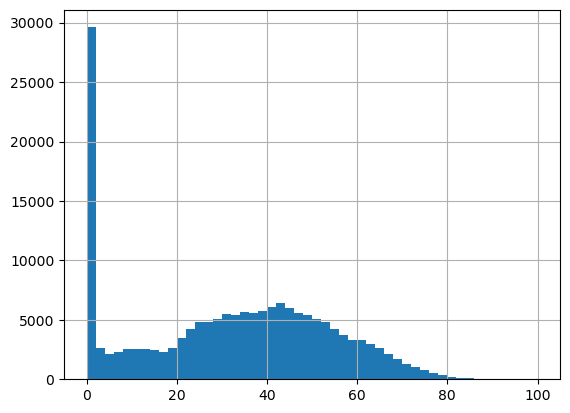

In [209]:
data['popularity'].hist(bins=50)

Encontramos muitos valores próximos de 0. Esses valores terão de ser tratados de modo a melhorar a distribuição dos valores no dataset.

In [210]:
data[data['popularity'] == 0]

acousticness                                     artists  \
0              0.995                         ['Carl Woitschach']   
1              0.994    ['Robert Schumann', 'Vladimir Horowitz']   
2              0.604                     ['Seweryn Goszczyński']   
3              0.995                        ['Francisco Canaro']   
5              0.995  ['Felix Mendelssohn', 'Vladimir Horowitz']   
...              ...                                         ...   
169822         0.217                                ['Don Omar']   
169825         0.913                                 ['ROSALÍA']   
169826         0.921                                 ['ROSALÍA']   
169849         0.262                          ['Ellie Goulding']   
169850         0.932                          ['Ellie Goulding']   

        danceability  duration_ms  energy  explicit  instrumentalness  key  \
0              0.708       158648  0.1950         0          0.563000   10   
1              0.379       282133  0.0135         0          0.901000    8   
2              0.749       104300  0.2200         0          0.000000    5   
3              0.781       180760  0.1300         0          0.887000    1   
5              0.424       352600  0.1200         0          0.911000    6   
...              ...          ...     ...       ...               ...  ...   
169822         0.741       255680  0.7870         0          0.017900    5   
169825         0.698       253109  0.2900         0          0.000021    4   
169826         0.442       214012  0.2670         0          0.000017    6   
169849         0.453       148689  0.3160         0          0.000894    0   
169850         0.491       188733  0.3670         0          0.000876   10   

        liveness  loudness  mode  \
0         0.1510   -12.428     1   
1         0.0763   -28.454     1   
2         0.1190   -19.924     0   
3         0.1110   -14.734     0   
5         0.0915   -19.242     0   
...          ...       ...   ...   
169822    0.0835    -6.228     1   
169825    0.0950    -6.899     0   
169826    0.1210    -9.640     0   
169849    0.1350    -8.525     1   
169850    0.1110    -7.164     1   

                                                 name  popularity  \
0                         Singende Bataillone 1. Teil           0   
1            Fantasiestücke, Op. 111: Più tosto lento           0   
2                      Chapter 1.18 - Zamek kaniowski           0   
3       Bebamos Juntos - Instrumental (Remasterizado)           0   
5                         Scherzo a capriccio: Presto           0   
...                                               ...         ...   
169822                                   Pobre Diabla           0   
169825                             Aunque Es De Noche           0   
169826                                       Catalina           0   
169849                       How Long Will I Love You           0   
169850                                      Your Song           0   

       release_date  speechiness    tempo  valence  year  duration_minutes  
0              1928       0.0506  118.469   0.7790  1928          2.644133  
1              1928       0.0462   83.972   0.0767  1928          4.702217  
2              1928       0.9290  107.177   0.8800  1928          1.738333  
3        1928-09-25       0.0926  108.003   0.7200  1928          3.012667  
5              1928       0.0593   63.521   0.2660  1928          5.876667  
...             ...          ...      ...      ...   ...               ...  
169822   2020-06-05       0.0525   91.993   0.7710  2020          4.261333  
169825   2020-06-05       0.0510  137.949   0.3980  2020          4.218483  
169826   2020-06-05       0.0582   78.171   0.3220  2020          3.566867  
169849   2020-06-05       0.0316  125.628   0.1770  2020          2.478150  
169850   2020-06-05       0.0308  134.105   0.4550  2020          3.145550  

[27357 rows x 19 columns]

Entender as caraterísticas da distribuição

In [222]:
print("Kurtosis: ", data['popularity'].kurt())
print("Skewness: ", data['popularity'].skew())

Kurtosis:  -1.0150008070115726
Skewness:  -0.021527012724844044


- Kurtose negativa -> muitos dados próximos da média
- Skewness próxima de 0 -> distribuição com pouco desvio 

Entender quais são as músicas mais populares e as menos populares

In [211]:
data.sort_values(by=['popularity'], ascending=False)

acousticness                                     artists  \
87942        0.00146                              ['The Weeknd']   
87940        0.24700                   ['DaBaby', 'Roddy Ricch']   
87949        0.73100                    ['Powfu', 'beabadoobee']   
87941        0.23300  ['THE SCOTTS', 'Travis Scott', 'Kid Cudi']   
87852        0.06860                     ['Surf Mesa', 'Emilee']   
...              ...                                         ...   
145185       0.99500             ['Leela Chitnis', 'Arun Kumar']   
145183       0.80400                                    ['Ravi']   
145181       0.99500   ['Ibrahim Özgür', 'Park Otel Orkestrası']   
145179       0.99200   ['Ludwig van Beethoven', 'Claudio Arrau']   
0            0.99500                         ['Carl Woitschach']   

        danceability  duration_ms   energy  explicit  instrumentalness  key  \
87942          0.514       200040  0.73000         0          0.000095    1   
87940          0.746       181733  0.69000         1          0.000000   11   
87949          0.726       173333  0.43100         0          0.000000    8   
87941          0.716       165978  0.53700         1          0.000000    0   
87852          0.674       176547  0.77400         0          0.001880   11   
...              ...          ...      ...       ...               ...  ...   
145185         0.682       200870  0.06800         0          0.120000    4   
145183         0.400       200027  0.38000         0          0.700000    3   
145181         0.379       189015  0.08830         0          0.920000    2   
145179         0.307        68067  0.00757         0          0.760000    3   
0              0.708       158648  0.19500         0          0.563000   10   

        liveness  loudness  mode  \
87942     0.0897    -5.934     1   
87940     0.1010    -7.956     1   
87949     0.6960    -8.765     0   
87941     0.1570    -7.648     0   
87852     0.3930    -7.567     0   
...          ...       ...   ...   
145185    0.1260   -12.267     0   
145183    0.1920   -12.655     1   
145181    0.1290   -19.572     0   
145179    0.1350   -28.996     1   
0         0.1510   -12.428     1   

                                                     name  popularity  \
87942                                     Blinding Lights         100   
87940                        ROCKSTAR (feat. Roddy Ricch)          99   
87949   death bed (coffee for your head) (feat. beabad...          97   
87941                                          THE SCOTTS          96   
87852                ily (i love you baby) (feat. Emilee)          95   
...                                                   ...         ...   
145185                        Nadiya Ke Tat Pe Khadi Hoon           0   
145183                                  Main Hoon Majboor           0   
145181                         Kalbimde Hiç Yerin Kalmadı           0   
145179  Variations and Fugue in E-Flat Major, Op. 35 "...           0   
0                             Singende Bataillone 1. Teil           0   

       release_date  speechiness    tempo  valence  year  duration_minutes  
87942    2020-03-20       0.0598  171.005    0.334  2020          3.334000  
87940    2020-04-17       0.1640   89.977    0.497  2020          3.028883  
87949    2020-02-08       0.1350  144.026    0.348  2020          2.888883  
87941    2020-04-24       0.0514  129.979    0.280  2020          2.766300  
87852    2019-11-26       0.0892  112.050    0.330  2019          2.942450  
...             ...          ...      ...      ...   ...               ...  
145185   1941-12-31       0.3020   74.537    0.872  1941          3.347833  
145183   1941-12-01       0.0340  158.558    0.490  1941          3.333783  
145181   1941-01-01       0.0703   64.766    0.514  1941          3.150250  
145179         1941       0.0430  137.694    0.207  1941          1.134450  
0              1928       0.0506  118.469    0.779  1928          2.644133  

[169909

As 5 músicas mais populares são recentes (2022 e 2023), enquanto que as 5 músicas menos populares são anteriores a 2010

Vamos também analisar quais os artistas mais populares. Para isso, teremos que tratar a coluna dos artistas, criando um novo registo para cada artista da música.

In [212]:
data["artists"] = data["artists"].str.replace("[\[\]']", "", regex=True)

In [213]:
data['artists'] = data['artists'].str.split(', ')

In [214]:
df_exploded = data.explode('artists')
df_exploded

acousticness              artists  danceability  duration_ms  energy  \
0             0.9950      Carl Woitschach         0.708       158648  0.1950   
1             0.9940      Robert Schumann         0.379       282133  0.0135   
1             0.9940    Vladimir Horowitz         0.379       282133  0.0135   
2             0.6040  Seweryn Goszczyński         0.749       104300  0.2200   
3             0.9950     Francisco Canaro         0.781       180760  0.1300   
...              ...                  ...           ...          ...     ...   
169906        0.5380                 Kygo         0.514       180700  0.5390   
169906        0.5380            Oh Wonder         0.514       180700  0.5390   
169907        0.0714            Cash Cash         0.646       167308  0.7610   
169907        0.0714         Andy Grammer         0.646       167308  0.7610   
169908        0.1090       Ingrid Andress         0.512       214787  0.4280   

        explicit  instrumentalness  key  liveness  loudness  mode  \
0              0           0.56300   10    0.1510   -12.428     1   
1              0           0.90100    8    0.0763   -28.454     1   
1              0           0.90100    8    0.0763   -28.454     1   
2              0           0.00000    5    0.1190   -19.924     0   
3              0           0.88700    1    0.1110   -14.734     0   
...          ...               ...  ...       ...       ...   ...   
169906         0           0.00233    7    0.1080    -9.332     1   
169906         0           0.00233    7    0.1080    -9.332     1   
169907         0           0.00000    1    0.2220    -2.557     1   
169907         0           0.00000    1    0.2220    -2.557     1   
169908         0           0.00000    0    0.1050    -7.387     1   

                                                 name  popularity  \
0                         Singende Bataillone 1. Teil           0   
1            Fantasiestücke, Op. 111: Più tosto lento           0   
1            Fantasiestücke, Op. 111: Più tosto lento           0   
2                      Chapter 1.18 - Zamek kaniowski           0   
3       Bebamos Juntos - Instrumental (Remasterizado)           0   
...                                               ...         ...   
169906                               How Would I Know          70   
169906                               How Would I Know          70   
169907                                    I Found You          70   
169907                                    I Found You          70   
169908                          More Hearts Than Mine          65   

       release_date  speechiness    tempo  valence  year  duration_minutes  
0              1928       0.0506  118.469   0.7790  1928          2.644133  
1              1928       0.0462   83.972   0.0767  1928          4.702217  
1              1928       0.0462   83.972   0.0767  1928          4.702217  
2              1928       0.9290  107.177   0.8800  1928          1.738333  
3        1928-09-25       0.0926  108.003   0.7200  1928          3.012667  
...             ...          ...      ...      ...   ...               ...  
169906   2020-05-29       0.1050  123.700   0.1530  2020          3.011667  
169906   2020-05-29       0.1050  123.700   0.1530  2020          3.011667  
169907   2020-02-28       0.0385  129.916   0.4720  2020          2.788467  
169907   2020-02-28       0.0385  129.916   0.4720  2020          2.788467  
169908   2020-03-27       0.0271   80.588   0.3660  2020          3.579783  

[226784 rows x 19 columns]

Verificar quais são os artistas mais populares

In [215]:
groups_artist_name = df_exploded.groupby(by=['artists']).agg({'name':'count', 'popularity':'median'}).rename(columns={'name':'count'}).reset_index().sort_values(by=['popularity'], ascending=False)
groups_artist_name[groups_artist_name['count'] > 10] # Only show artists with more than N songs

artists  count  popularity
19899           Rauw Alejandro     16        79.5
2186                   Ava Max     12        78.0
21514                     Sech     22        78.0
6867                  Dua Lipa     33        77.0
3023             Billie Eilish     41        77.0
...                        ...    ...         ...
729    Academia dos Renascidos     20         0.0
12498         Joseph Keilberth     34         0.0
12471         Josef Metternich     12         0.0
22165       Snehprabha Pradhan     19         0.0
22150      Smt. Angurbala Devi     19         0.0

[3952 rows x 3 columns]

... e quais os artistas com mais músicas

In [216]:
groups_artist_name.sort_values(by=['count'], ascending=False).to_csv('artists.csv', index=False)

Vamos também analisar as tendências em cada ano

In [217]:
# Formato das datas
data["release_date"].tail()

169904    2020-05-15
169905    2020-06-08
169906    2020-05-29
169907    2020-02-28
169908    2020-03-27
Name: release_date, dtype: object

In [186]:
# Documentar o que foi feito aqui
import re

data_copy = df_exploded.copy()
data_copy["release_date"] = pd.to_datetime(data["release_date"], format='%Y-%m-%d', errors='coerce')

for index, row in data_copy.iterrows():
    if pd.isna(row['release_date']):
        original_value = data.loc[index, 'release_date']
        pattern = r'(\d{4})(-(\d{2}))?'
        match = re.search(pattern, original_value)
        if match:
            year = match.group(1)
            month = match.group(3) if match.group(3) else '01'  # se missing, assume 01
            day = '01' # se missing, assume 01
            new_date = year + '-' + month + '-' + day
            data_copy.loc[index, 'release_date'] = new_date       


In [187]:
assert data_copy["release_date"].isnull().sum() == 0, 'missing date'

Recuperar o ano, més e data de lançamento da música

In [188]:
data_copy["release_date_year"] = data_copy["release_date"].dt.year
data_copy["release_date_month"] = data_copy["release_date"].dt.month
data_copy["release_date_day"] = data_copy["release_date"].dt.day
data_copy.drop(columns=['release_date'], inplace=True)
data_copy.head()

acousticness              artists  danceability  duration_ms  energy  \
0         0.995      Carl Woitschach         0.708       158648  0.1950   
1         0.994      Robert Schumann         0.379       282133  0.0135   
1         0.994    Vladimir Horowitz         0.379       282133  0.0135   
2         0.604  Seweryn Goszczyński         0.749       104300  0.2200   
3         0.995     Francisco Canaro         0.781       180760  0.1300   

   explicit  instrumentalness  key  liveness  loudness  ...  \
0         0             0.563   10    0.1510   -12.428  ...   
1         0             0.901    8    0.0763   -28.454  ...   
1         0             0.901    8    0.0763   -28.454  ...   
2         0             0.000    5    0.1190   -19.924  ...   
3         0             0.887    1    0.1110   -14.734  ...   

                                            name popularity  speechiness  \
0                    Singende Bataillone 1. Teil          0       0.0506   
1       Fantasiestücke, Op. 111: Più tosto lento          0       0.0462   
1       Fantasiestücke, Op. 111: Più tosto lento          0       0.0462   
2                 Chapter 1.18 - Zamek kaniowski          0       0.9290   
3  Bebamos Juntos - Instrumental (Remasterizado)          0       0.0926   

     tempo  valence  year  duration_minutes  release_date_year  \
0  118.469   0.7790  1928          2.644133               1928   
1   83.972   0.0767  1928          4.702217               1928   
1   83.972   0.0767  1928          4.702217               1928   
2  107.177   0.8800  1928          1.738333               1928   
3  108.003   0.7200  1928          3.012667               1928   

   release_date_month  release_date_day  
0                   1                 1  
1                   1                 1  
1                   1                 1  
2                   1                 1  
3                   9                25  

[5 rows x 21 columns]

In [189]:
#data_copy.drop(columns=['year'], inplace=True)

In [190]:
data_copy

acousticness              artists  danceability  duration_ms  energy  \
0             0.9950      Carl Woitschach         0.708       158648  0.1950   
1             0.9940      Robert Schumann         0.379       282133  0.0135   
1             0.9940    Vladimir Horowitz         0.379       282133  0.0135   
2             0.6040  Seweryn Goszczyński         0.749       104300  0.2200   
3             0.9950     Francisco Canaro         0.781       180760  0.1300   
...              ...                  ...           ...          ...     ...   
169906        0.5380                 Kygo         0.514       180700  0.5390   
169906        0.5380            Oh Wonder         0.514       180700  0.5390   
169907        0.0714            Cash Cash         0.646       167308  0.7610   
169907        0.0714         Andy Grammer         0.646       167308  0.7610   
169908        0.1090       Ingrid Andress         0.512       214787  0.4280   

        explicit  instrumentalness  key  liveness  loudness  ...  \
0              0           0.56300   10    0.1510   -12.428  ...   
1              0           0.90100    8    0.0763   -28.454  ...   
1              0           0.90100    8    0.0763   -28.454  ...   
2              0           0.00000    5    0.1190   -19.924  ...   
3              0           0.88700    1    0.1110   -14.734  ...   
...          ...               ...  ...       ...       ...  ...   
169906         0           0.00233    7    0.1080    -9.332  ...   
169906         0           0.00233    7    0.1080    -9.332  ...   
169907         0           0.00000    1    0.2220    -2.557  ...   
169907         0           0.00000    1    0.2220    -2.557  ...   
169908         0           0.00000    0    0.1050    -7.387  ...   

                                                 name popularity  speechiness  \
0                         Singende Bataillone 1. Teil          0       0.0506   
1            Fantasiestücke, Op. 111: Più tosto lento          0       0.0462   
1            Fantasiestücke, Op. 111: Più tosto lento          0       0.0462   
2                      Chapter 1.18 - Zamek kaniowski          0       0.9290   
3       Bebamos Juntos - Instrumental (Remasterizado)          0       0.0926   
...                                               ...        ...          ...   
169906                               How Would I Know         70       0.1050   
169906                               How Would I Know         70       0.1050   
169907                                    I Found You         70       0.0385   
169907                                    I Found You         70       0.0385   
169908                          More Hearts Than Mine         65       0.0271   

          tempo  valence  year  duration_minutes  release_date_year  \
0       118.469   0.7790  1928          2.644133               1928   
1        83.972   0.0767  1928          4.702217               1928   
1        83.972   0.0767  1928          4.702217               1928   
2       107.177   0.8800  1928          1.738333               1928   
3       108.003   0.7200  1928          3.012667               1928   
...         ...      ...   ...               ...                ...   
169906  123.700   0.1530  2020          3.011667               2020   
169906  123.700   0.1530  2020          3.011667               2020   
169907  129.916   0.4720  2020          2.788467               2020   
169907  129.916   0.4720  2020          2.788467               2020   
169908   80.588   0.3660  2020          3.579783               2020   

        release_date_month  release_date_day  
0                        1                 1  
1                        1                 1  
1                        1                 1  
2                        1                 1  
3                        9                25  
...                    ...               ...  
169906                   5                29  
169906                   5  

In [191]:
data_copy.groupby(by=['release_date_year']).mean(numeric_only=True)

acousticness  danceability    duration_ms    energy  \
release_date_year                                                        
1921                   0.916756      0.383010  280257.547486  0.205558   
1922                   0.939236      0.480000  167904.541667  0.237026   
1923                   0.976817      0.566158  178865.338983  0.242529   
1924                   0.930313      0.564704  189280.673469  0.349144   
1925                   0.964912      0.570644  184369.080986  0.265696   
...                         ...           ...            ...       ...   
2016                   0.260713      0.611750  222299.679003  0.606821   
2017                   0.273272      0.630120  212529.617909  0.595713   
2018                   0.252368      0.678795  204467.206461  0.601792   
2019                   0.258683      0.667129  202088.909031  0.605940   
2020                   0.228319      0.689018  201172.792012  0.626098   

                   explicit  instrumentalness       key  liveness   loudness  \
release_date_year                                                              
1921               0.039106          0.426467  5.005587  0.207895 -18.553078   
1922               0.000000          0.440470  5.236111  0.238647 -19.179958   
1923               0.000000          0.394388  4.836158  0.235491 -14.393051   
1924               0.000000          0.532110  5.710884  0.231976 -13.715020   
1925               0.000000          0.413303  5.102113  0.250037 -14.405359   
...                     ...               ...       ...       ...        ...   
2016               0.380359          0.065032  5.260535  0.187276  -7.623838   
2017               0.404567          0.078004  5.049946  0.193342  -7.988346   
2018               0.503511          0.028675  5.379565  0.172986  -7.006723   
2019               0.464368          0.052061  5.133662  0.168256  -7.307836   
2020               0.516202          0.029671  5.284476  0.179858  -6.881098   

                       mode  popularity  speechiness       tempo   valence  \
release_date_year                                                            
1921               0.675978    0.458101     0.067323   96.732419  0.356303   
1922               0.625000    0.138889     0.115419  101.376139  0.534056   
1923               0.779661    6.084746     0.097378  111.297249  0.617820   
1924               0.751701    1.013605     0.086780  121.410201  0.680548   
1925               0.721831    2.904930     0.120398  115.269595  0.610018   
...                     ...         ...          ...         ...       ...   
2016               0.613045   61.499084     0.118686  119.031116  0.432510   
2017               0.608277   64.993578     0.120951  118.134629  0.417429   
2018               0.588132   67.463834     0.137943  122.283846  0.450046   
2019               0.603612   70.250903     0.135213  120.004241  0.492104   
2020               0.591183   63.674454     0.150073  122.045300  0.494969   

                     year  duration_minutes  release_date_month  \
release_date_year                                                 
1921               1921.0          4.670959            1.664804   
1922               1922.0          2.798409            2.166667   
1923               1923.0          2.981089            2.028249   
1924               1924.0          3.154678            2.911565   
1925               1925.0          3.072818            2.461268   
...                   ...               ...                 ...   
2016               2016.0          3.704995            7.066325   
2017               2017.0          3.542160            6.935783   
2018               2018.0          3.407787            7.166433   
2019               2019.0          3.368148            7.130706   
2020               2020.0          3.352880            3.896006   

                   release_date_day  
release_date_year                    
1921                       4.173184  
1922          

Algumas conclusões interessantes:

- quanto mais próximas do atual, maior é a popularidade da música;

- as músicas tem-se tornado mais enérgicas;

- e têm perdido acústica e valência;

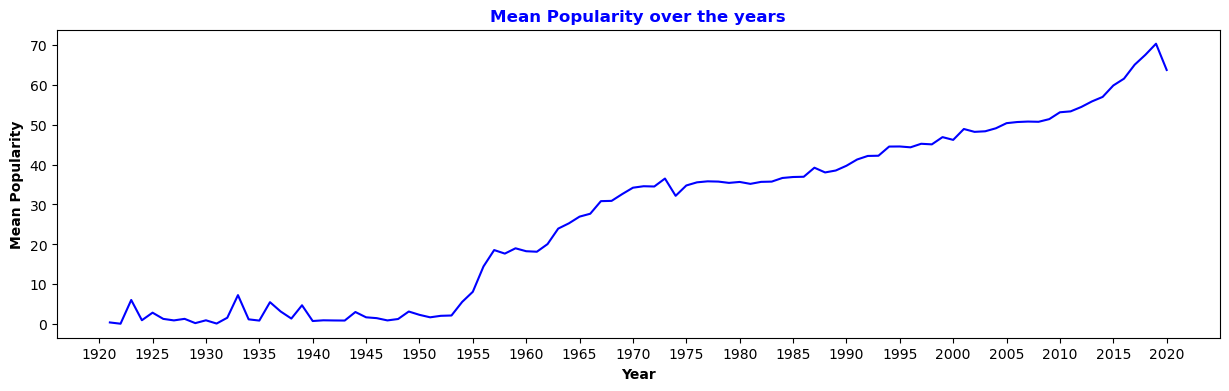

In [192]:
fig, ax = plt.subplots(figsize=(15, 4))
ax = data_copy.groupby('release_date_year')['popularity'].mean().plot(color='blue')
ax.set_title('Mean Popularity over the years', c='blue', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_xticks(range(1920, 2021, 5))
plt.show()

Distribuição do tom da música ao longo do tempo

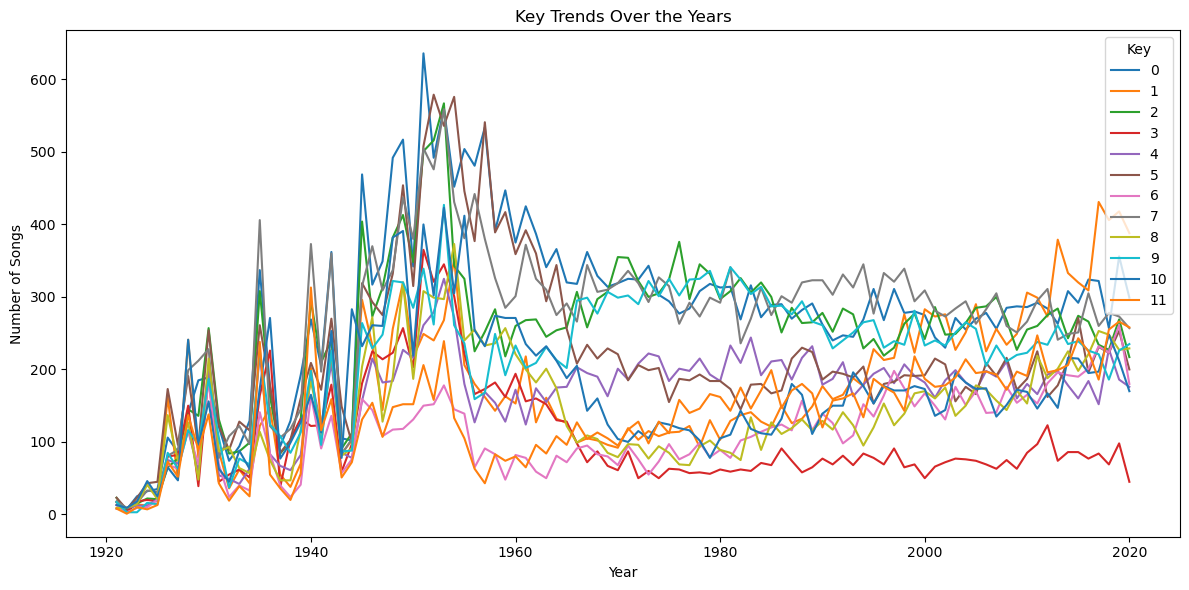

In [193]:
time_signature_counts = data_copy.groupby(['release_date_year', 'key']).size().unstack(fill_value=0)

# Create a line chart to visualize time signature trends over the years
time_signature_counts.plot(kind='line', figsize=(12, 6))
    
plt.title('Key Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Key', loc='upper right')

plt.tight_layout()
plt.show()

Explicit Trends over the years

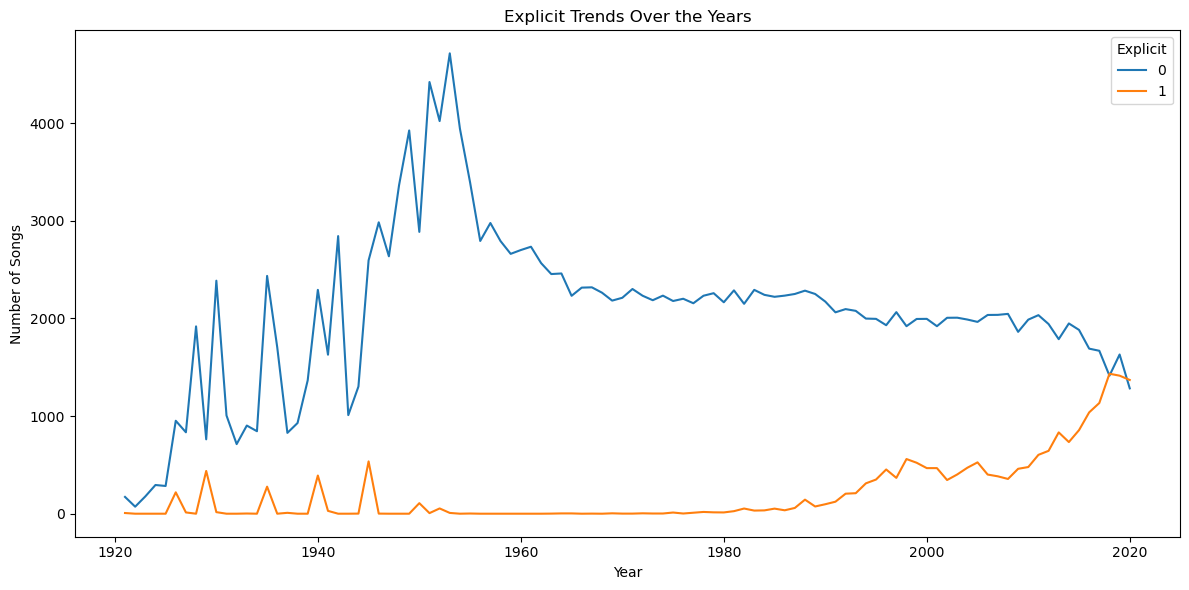

In [194]:
time_signature_counts = data_copy.groupby(['release_date_year', 'explicit']).size().unstack(fill_value=0)

# Create a line chart to visualize time signature trends over the years
time_signature_counts.plot(kind='line', figsize=(12, 6))
    
plt.title('Explicit Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Explicit', loc='upper right')

plt.tight_layout()
plt.show()

Alguns registos explicit de 1930??

In [218]:
data_copy[(data_copy['explicit'] == 1) & (data_copy['release_date_year'] <= 1950)]

acousticness           artists  danceability  duration_ms  energy  \
167            0.445     Shorty Bralik         0.613       206785   0.550   
167            0.445   ParkPlace Swagg         0.613       206785   0.550   
204            0.492  Эрнест Хемингуэй         0.626       109512   0.225   
215            0.333  Эрнест Хемингуэй         0.714       118585   0.178   
222            0.250  Эрнест Хемингуэй         0.711        97046   0.121   
...              ...               ...           ...          ...     ...   
162861         0.409  Эрнест Хемингуэй         0.731        98500   0.248   
162881         0.607  Эрнест Хемингуэй         0.675        98900   0.299   
162907         0.733  Эрнест Хемингуэй         0.734       104400   0.343   
162920         0.536  Эрнест Хемингуэй         0.768       109300   0.311   
162925         0.690  Эрнест Хемингуэй         0.752        96700   0.261   

        explicit  instrumentalness  key  liveness  loudness  ...  \
167            1               0.0    4    0.1070   -12.050  ...   
167            1               0.0    4    0.1070   -12.050  ...   
204            1               0.0    7    0.1640   -16.619  ...   
215            1               0.0    7    0.2700   -15.534  ...   
222            1               0.0   11    0.1710   -19.258  ...   
...          ...               ...  ...       ...       ...  ...   
162861         1               0.0    0    0.0917   -16.434  ...   
162881         1               0.0    1    0.4620   -17.346  ...   
162907         1               0.0    2    0.1070   -19.012  ...   
162920         1               0.0    0    0.3130   -16.384  ...   
162925         1               0.0    1    0.2010   -15.596  ...   

                                                  name popularity  \
167                                          No Lack'n          0   
167                                          No Lack'n          0   
204     Часть 58.3 & Часть 59.1 - Зеленые холмы Африки          0   
215       Часть 2.3 & Часть 3.1 - Зеленые холмы Африки          0   
222     Часть 26.4 & Часть 27.1 - Зеленые холмы Африки          0   
...                                                ...        ...   
162861           Часть 3.3 - За рекой, в тени деревьев          0   
162881          Часть 57.2 - За рекой, в тени деревьев          0   
162907          Часть 78.2 - За рекой, в тени деревьев          0   
162920          Часть 42.2 - За рекой, в тени деревьев          0   
162925          Часть 52.3 - За рекой, в тени деревьев          0   

        speechiness    tempo  valence  year  duration_minutes  \
167           0.404  116.576    0.352  1930          3.446417   
167           0.404  116.576    0.352  1930          3.446417   
204           0.949  174.223    0.534  1935          1.825200   
215           0.892  130.663    0.552  1935          1.976417   
222           0.923  128.659    0.688  1935          1.617433   
...             ...      ...      ...   ...               ...   
162861        0.863   82.926    0.318  1950          1.641667   
162881        0.915   97.874    0.560  1950          1.648333   
162907        0.934   84.456    0.512  1950          1.740000   
162920        0.935   97.067    0.551  1950          1.821667   
162925        0.888   81.768    0.552  1950          1.611667   

        release_date_year  release_date_month  release_date_day  
167                  1930                   5                29  
167                  1930                   5                29  
204                  1935                   1                 1  
215                  1935                   1                 1  
222                  1935                   1                 1  
...                   ...                 ...               ...  
162861               1950                   1                 1  
162881               1950                   1                 1  
162907               1950                   1                 

Mode trends over the years

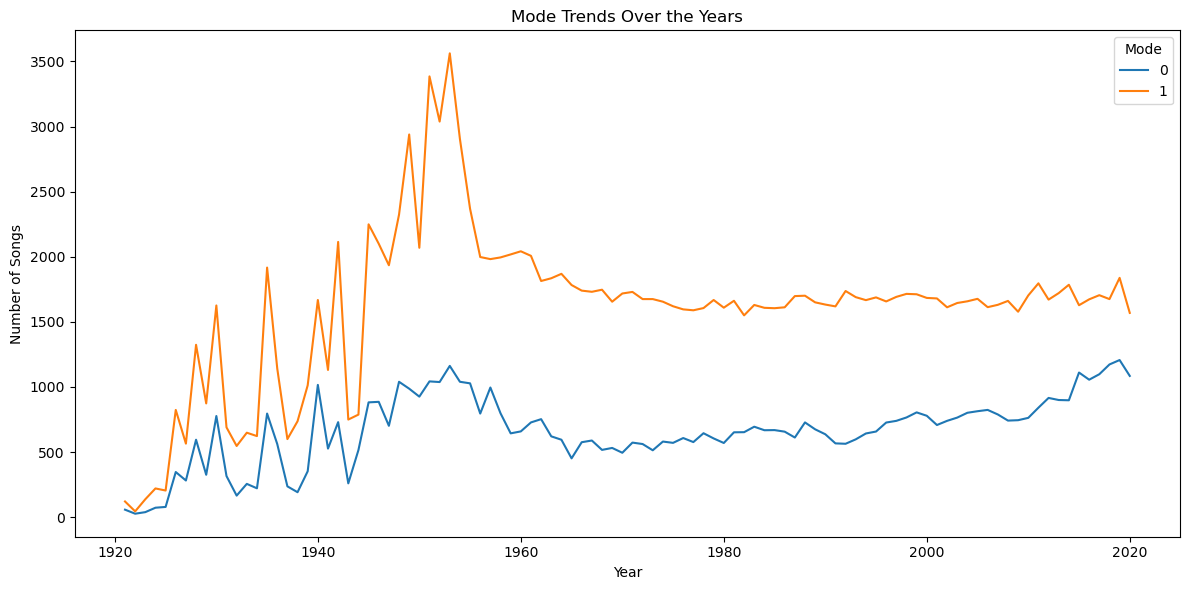

In [219]:
mode_counts = data_copy.groupby(['release_date_year', 'mode']).size().unstack(fill_value=0)

# Create a line chart to visualize time signature trends over the years
mode_counts.plot(kind='line', figsize=(12, 6))
    
plt.title('Mode Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Mode', loc='upper right')

plt.tight_layout()
plt.show()

Major = 1, Minor = 0

Mode vs Key

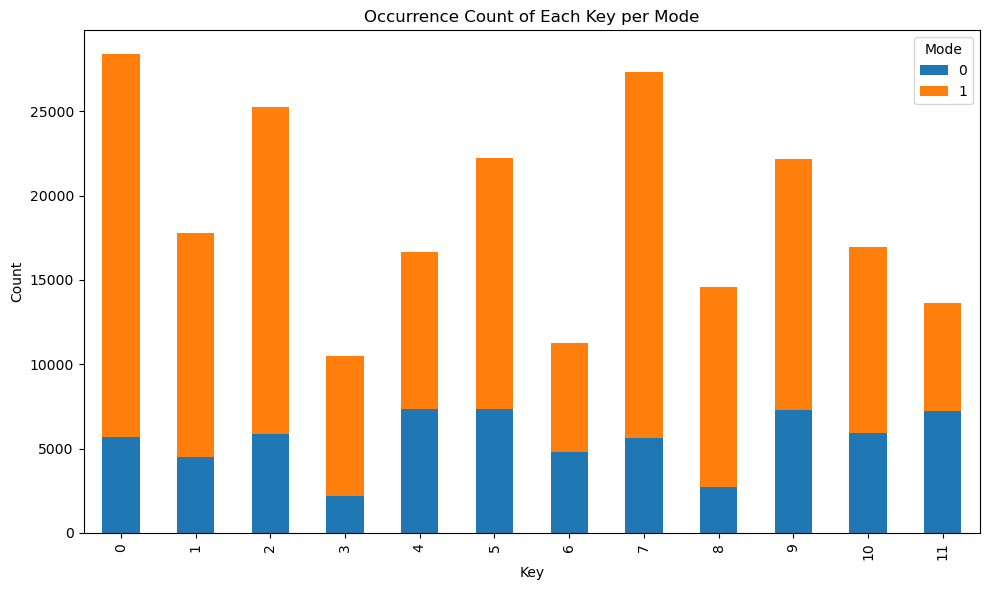

In [227]:
key_mode_counts = data_copy.groupby(['key', 'mode']).size().unstack(fill_value=0)

# Plotting the bar chart
key_mode_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Occurrence Count of Each Key per Mode')

# Show plot
plt.legend(title='Mode', loc='upper right')
plt.tight_layout()
plt.show()

Energy trends over the years

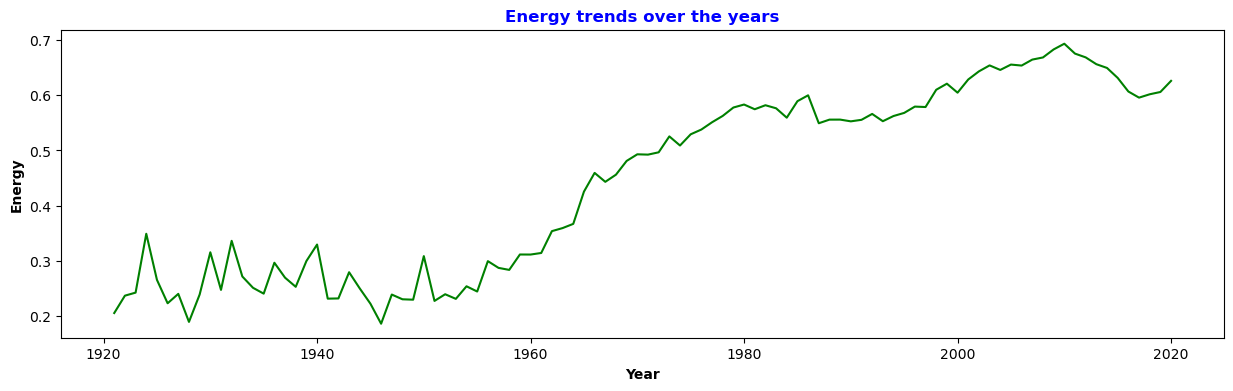

In [221]:
fig, ax = plt.subplots(figsize=(15, 4))
data_copy.groupby('release_date_year')['energy'].mean().plot(color='green', ax=ax)
ax.set_title('Energy trends over the years', c='blue', weight='bold')
ax.set_ylabel('Energy', weight='bold')
ax.set_xlabel('Year', weight='bold')
plt.show()

Vamos verificar se os anos de lançamento das músicas estão bem distribuídos

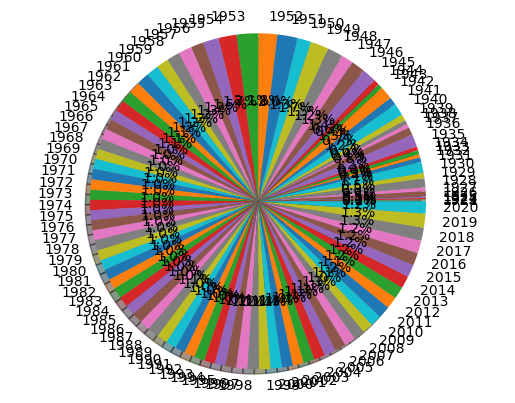

In [65]:
labels = data_copy['release_date_year'].astype('category').cat.categories.tolist()
counts = data_copy['release_date_year'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Verificamos que sim

Análise da popularidade com base no mês em que a mesma foi lançada

In [66]:
data_copy.groupby(by=['release_date_month']).mean(numeric_only=True)

acousticness  danceability    duration_ms    energy  \
release_date_month                                                        
1                       0.649773      0.490999  243926.413500  0.384508   
2                       0.389773      0.559320  240005.242497  0.546416   
3                       0.404033      0.559566  232605.486699  0.552464   
4                       0.373119      0.564840  231415.365785  0.562054   
5                       0.359839      0.569568  232063.794538  0.562650   
6                       0.358193      0.566921  230647.125970  0.573231   
7                       0.397602      0.555744  233663.350246  0.547592   
8                       0.387434      0.569852  231545.102183  0.561513   
9                       0.364440      0.565271  238311.822699  0.567243   
10                      0.348613      0.563612  241343.452268  0.581541   
11                      0.393745      0.556818  232176.825495  0.550367   
12                      0.687894      0.551598  220769.438205  0.416243   

                    explicit  instrumentalness       key  liveness   loudness  \
release_date_month                                                              
1                   0.051376          0.225397  5.130165  0.209137 -13.790767   
2                   0.153895          0.116476  5.311143  0.219977 -10.180917   
3                   0.151378          0.132406  5.202553  0.206483  -9.855632   
4                   0.165064          0.118388  5.244257  0.207442  -9.576910   
5                   0.179964          0.114206  5.211809  0.205916  -9.782749   
6                   0.145165          0.095192  5.182295  0.205595  -9.554559   
7                   0.145958          0.136753  5.140099  0.216515 -10.351035   
8                   0.142746          0.104855  5.209017  0.208418  -9.601188   
9                   0.142229          0.119576  5.292025  0.199588  -9.606398   
10                  0.135373          0.111220  5.241434  0.214673  -9.377151   
11                  0.142857          0.124311  5.181577  0.216458 -10.045542   
12                  0.097379          0.205325  5.254383  0.223241 -10.867342   

                        mode  popularity  speechiness       tempo   valence  \
release_date_month                                                            
1                   0.719791   21.377335     0.099644  112.650905  0.480037   
2                   0.687101   41.294860     0.091123  118.222530  0.525776   
3                   0.681737   40.825242     0.093113  119.368287  0.531855   
4                   0.672676   43.432025     0.091767  118.857150  0.518250   
5                   0.679510   44.399705     0.100961  118.386686  0.507630   
6                   0.691210   41.188693     0.089894  119.645554  0.533329   
7                   0.707684   38.680916     0.096768  118.489049  0.521256   
8                   0.703785   41.930629     0.088536  118.536303  0.536260   
9                   0.684458   42.238957     0.093381  119.309949  0.516707   
10                  0.700733   42.015647     0.089138  120.032211  0.523252   
11                  0.700318   40.170969     0.091925  118.098854  0.525057   
12                  0.677400   21.849939     0.110209  113.508302  0.582351   

                    duration_minutes  release_date_year  release_date_day  
release_date_month                                                         
1                           4.065440        1965.821163          1.650586  
2                           4.000087        1989.314017         13.035121  
3                           3.876758        1987.739353         14.520816  
4                           3.856923        1991.175748         14.213141  
5                           3.867730        1992.392339         14.287738  
6                           3.844119        1990.733585         13.655968  
7                           3.894389        1986.265415         14.057531  
8                           3.859085       

<Axes: >

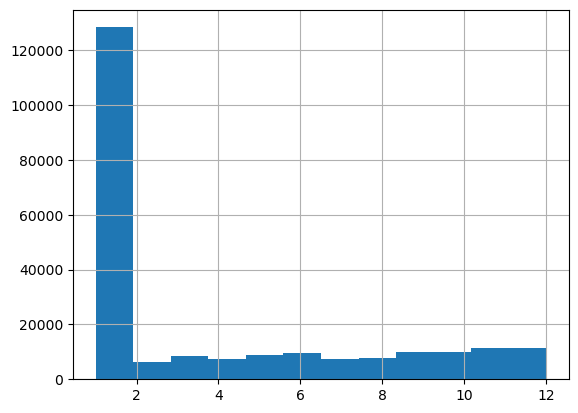

In [67]:
data_copy['release_date_month'].hist(bins=12)

A maioria das músicas são de Janeiro

In [68]:
data_copy[data_copy['release_date_month'] == 1]['artists'].value_counts()

artists
Эрнест Хемингуэй           1215
Frédéric Chopin            1017
Ludwig van Beethoven        928
Wolfgang Amadeus Mozart     853
Johann Sebastian Bach       846
                           ... 
Krosno Ensemble               1
Rudolf Cortés                 1
Tristan Tzara                 1
George Troville               1
Alexander 23                  1
Name: count, Length: 17353, dtype: int64

As músicas lançadas em Janeiro são de compositores mais antigos

Análise da popularidade com base no dia do mês em que a mesma foi lançada

In [69]:
data_copy.groupby(by=['release_date_day']).mean(numeric_only=True)

acousticness  danceability    duration_ms    energy  \
release_date_day                                                        
1                     0.647051      0.490110  243876.019733  0.386287   
2                     0.387773      0.554990  229959.107466  0.563009   
3                     0.383262      0.551256  240949.909916  0.543977   
4                     0.387371      0.569205  223130.852841  0.560941   
5                     0.379609      0.574985  236534.089436  0.568100   
6                     0.389245      0.570461  225092.323344  0.544376   
7                     0.406726      0.559666  230961.739049  0.538334   
8                     0.391983      0.545114  232437.293178  0.555682   
9                     0.312076      0.570975  237480.147746  0.597133   
10                    0.405909      0.551692  229524.263510  0.542670   
11                    0.433120      0.561480  230436.140083  0.530196   
12                    0.406916      0.576562  228544.780989  0.565221   
13                    0.381012      0.576118  226204.249921  0.553403   
14                    0.397875      0.573605  229956.518072  0.572006   
15                    0.400659      0.569299  233093.517542  0.546420   
16                    0.360539      0.599849  233281.019536  0.575296   
17                    0.350498      0.572815  237254.038319  0.576149   
18                    0.402400      0.569421  233697.973329  0.560209   
19                    0.371730      0.570170  232041.890205  0.573505   
20                    0.387433      0.583098  233730.086925  0.560035   
21                    0.353771      0.560479  230674.689930  0.591764   
22                    0.357646      0.562726  230780.870568  0.566426   
23                    0.360662      0.569443  236516.155005  0.589293   
24                    0.390327      0.571041  228207.845250  0.576244   
25                    0.414879      0.566795  227877.289566  0.539811   
26                    0.377126      0.571026  224867.075026  0.568628   
27                    0.296440      0.577483  238180.454812  0.607226   
28                    0.316716      0.571059  242430.518146  0.601101   
29                    0.321582      0.585168  240654.955148  0.572814   
30                    0.340387      0.583245  241609.067345  0.568719   
31                    0.729790      0.571007  222708.882688  0.399930   

                  explicit  instrumentalness       key  liveness   loudness  \
release_date_day                                                              
1                 0.048499          0.221125  5.139506  0.209577 -13.737944   
2                 0.131599          0.129788  5.366893  0.216037  -9.681491   
3                 0.135462          0.130503  5.082689  0.199684  -9.958184   
4                 0.147502          0.117894  5.384326  0.210611  -9.554623   
5                 0.165373          0.118849  5.258522  0.229785  -9.315436   
6                 0.192009          0.128631  5.273030  0.207403  -9.779561   
7                 0.125047          0.142273  5.197304  0.213610 -10.682580   
8                 0.161340          0.152290  5.174554  0.236711 -10.205724   
9                 0.168277          0.103455  5.200081  0.200190  -8.845426   
10                0.151947          0.101534  5.047356  0.221728  -9.923080   
11                0.147087          0.151467  5.057943  0.202410 -10.328994   
12                0.156436          0.158039  5.142133  0.218255  -9.469980   
13                0.174159          0.140369  5.380698  0.208673  -9.718212   
14                0.171211          0.115515  5.214014  0.223119  -9.596204   
15                0.156951          0.134766  5.061725  0.194147 -10.026936   
16                0.220199          0.122151  5.421523  0.212669  -9.264813   
17                0.166723          0.109972  5.255798  0.199075  -9.254496   
18                0.154339          0.137445  5.257112  0.197556  -9.430344   
19                0.121277  

<Axes: >

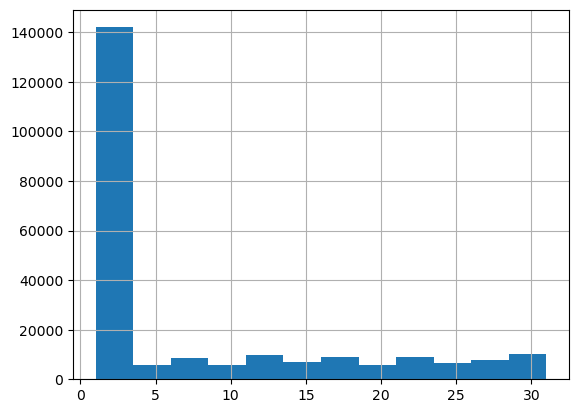

In [70]:
data_copy['release_date_day'].hist(bins=12)

São as mesmas músicas. Músicas mais antigas são lançadas no dia 1 de Janeiro

Análise do campo explicit

In [71]:
data_copy['explicit'].value_counts()

explicit
0    206053
1     20731
Name: count, dtype: int64

## Missing Values

Vamos verificar a existência de missing values

<Axes: >

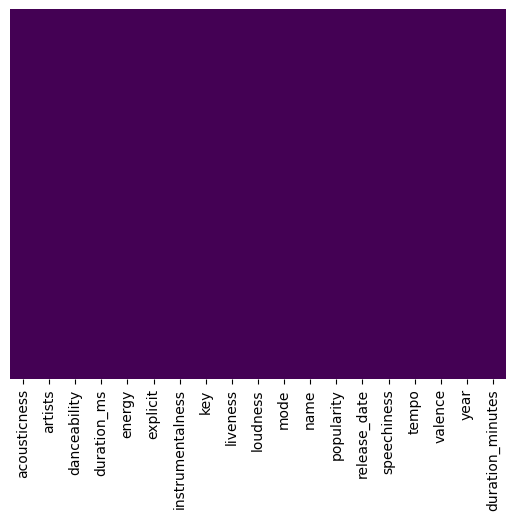

In [72]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Como podemos ver, não há missing values no nosso dataset.

## Correlações

In [73]:
# le = preprocessing.LabelEncoder()
# data_categorical_encoded = data.copy()
# data_categorical_encoded.drop(columns=['track_id', 'track_album_id', 'playlist_id'], inplace=True)

# data_categorical_encoded['playlist_genre'] = le.fit_transform(data['playlist_genre'])
# data_categorical_encoded['playlist_subgenre']= le.fit_transform(data['playlist_subgenre'])
# data_categorical_encoded['track_album_name']= le.fit_transform(data['track_album_name'])
# data_categorical_encoded['playlist_name']= le.fit_transform(data['playlist_name'])
# data_categorical_encoded['track_name']= le.fit_transform(data['track_name'])
# data_categorical_encoded['track_artist']= le.fit_transform(data['track_artist'])

# data_categorical_encoded.head()

In [74]:
data = data[data["popularity"] != 0]

<Axes: >

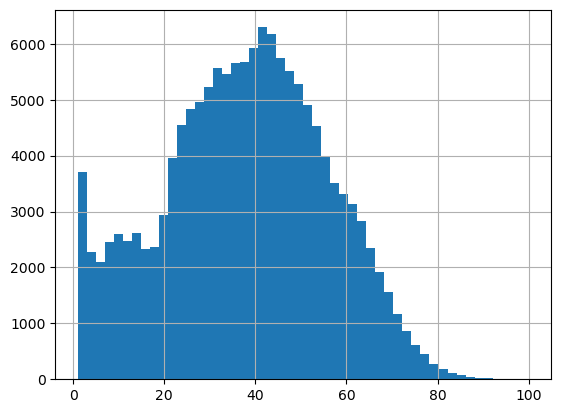

In [75]:
data['popularity'].hist(bins=50)

### Correlação de pearson

<Axes: >

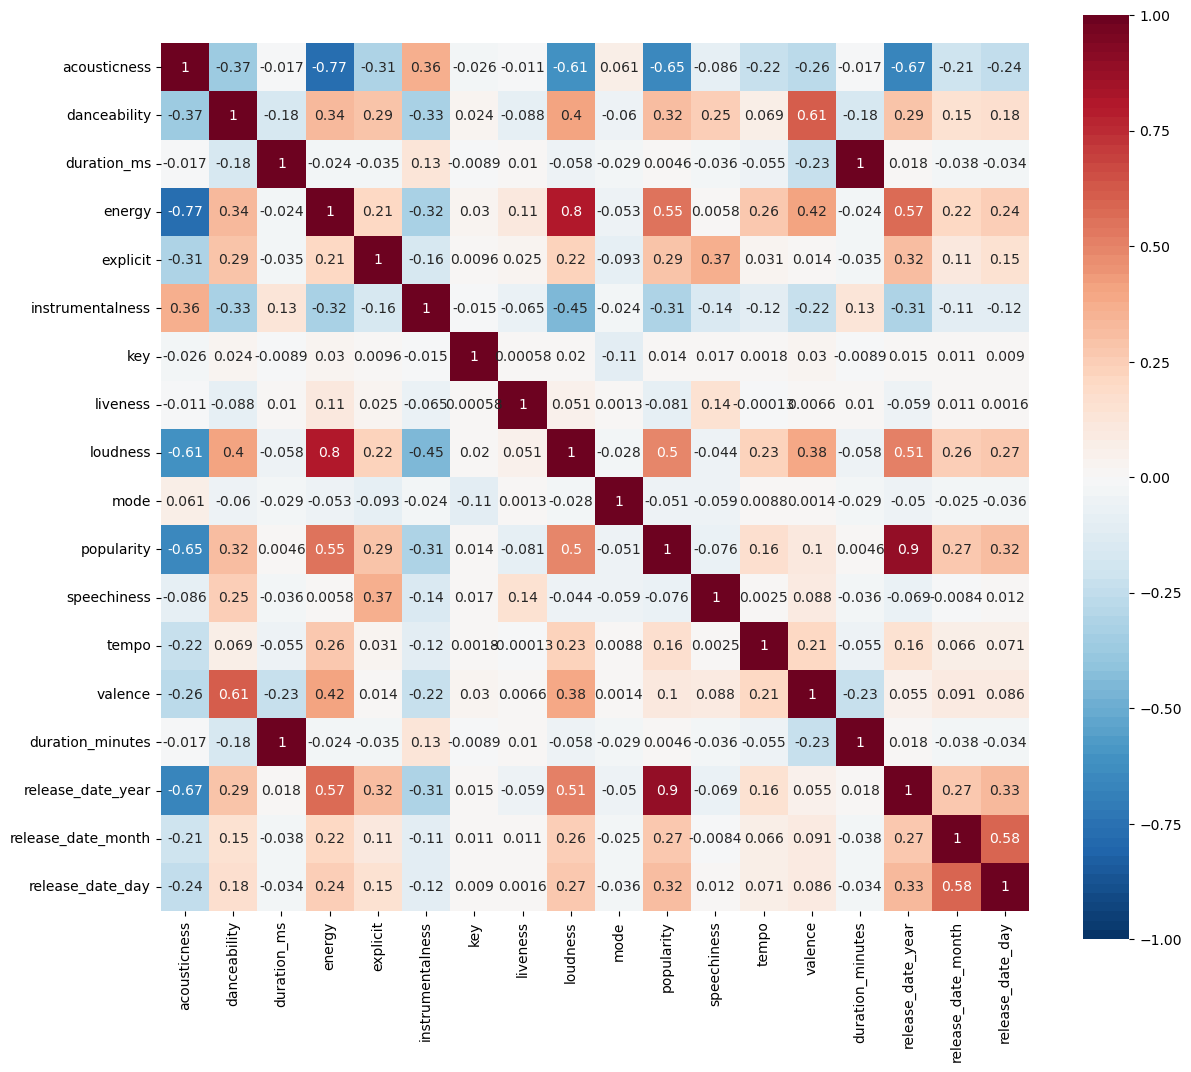

In [76]:
corr_matrix = data_copy.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

### Correlação de Spearman

<Axes: >

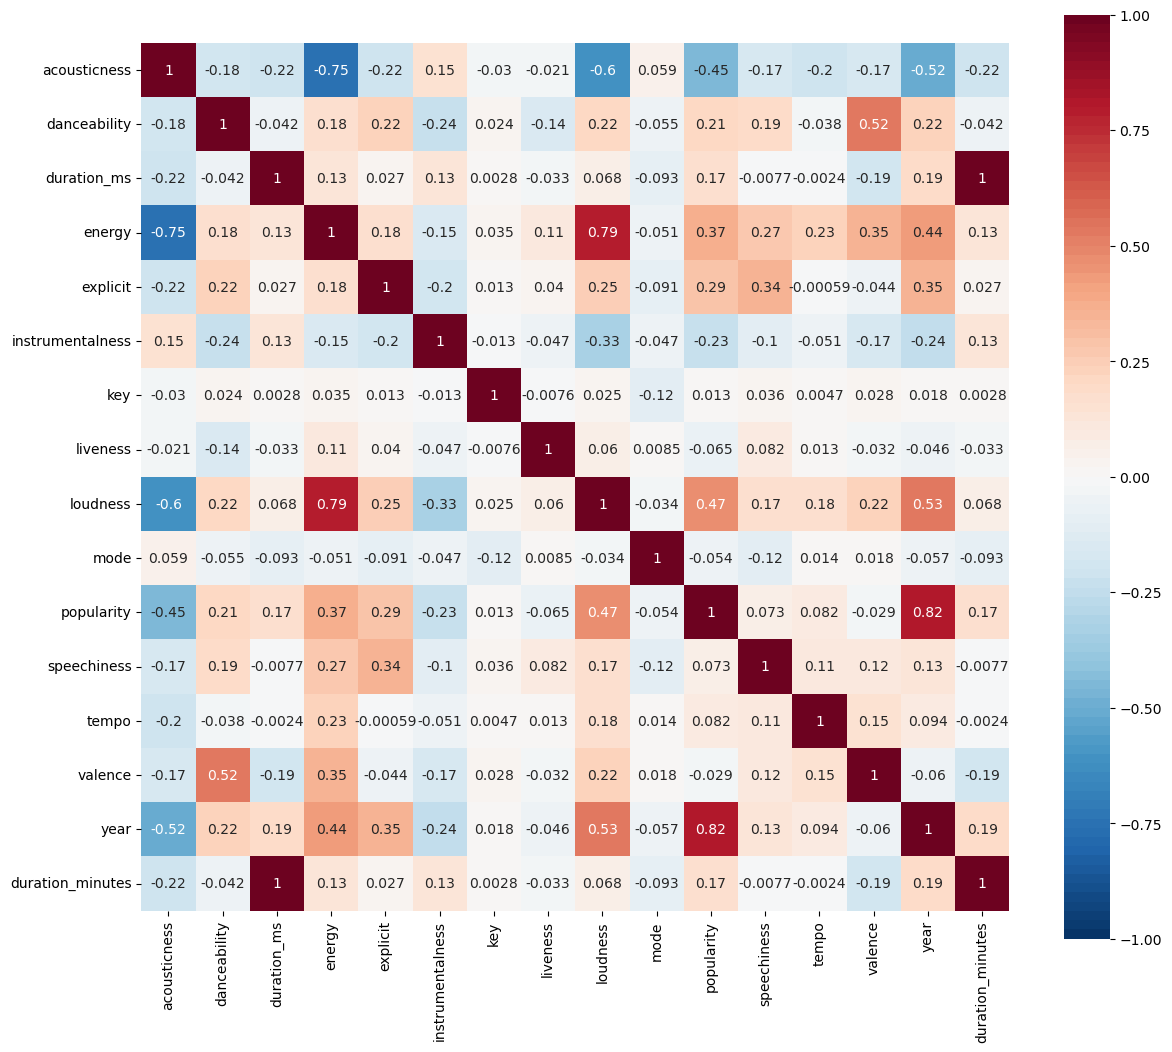

In [77]:
corr_matrix = data.corr(method='spearman', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

### Correlação de Kendall

<Axes: >

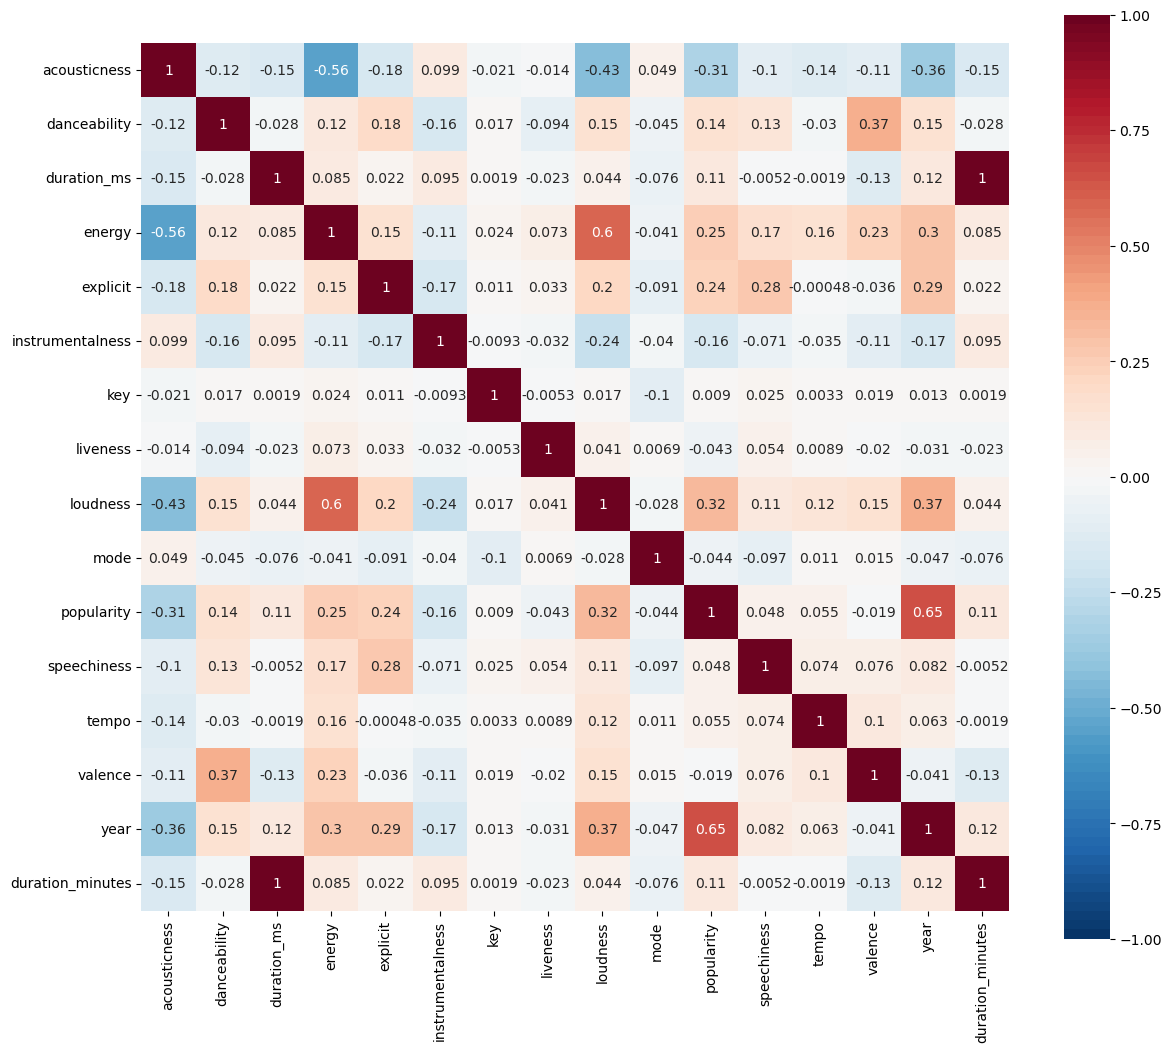

In [78]:
corr_matrix = data.corr(method='kendall', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

Das 3 correlações analisadas podemos ver que as features com maior correlação com a popularidade são:
- year;
- loudness;
- instrumentalness;
- explicit;
- energy;
- duration_ms;
- danceability;
- accousticness;

Podemos também visualizar a distribuição dos dados coluna vs coluna

/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


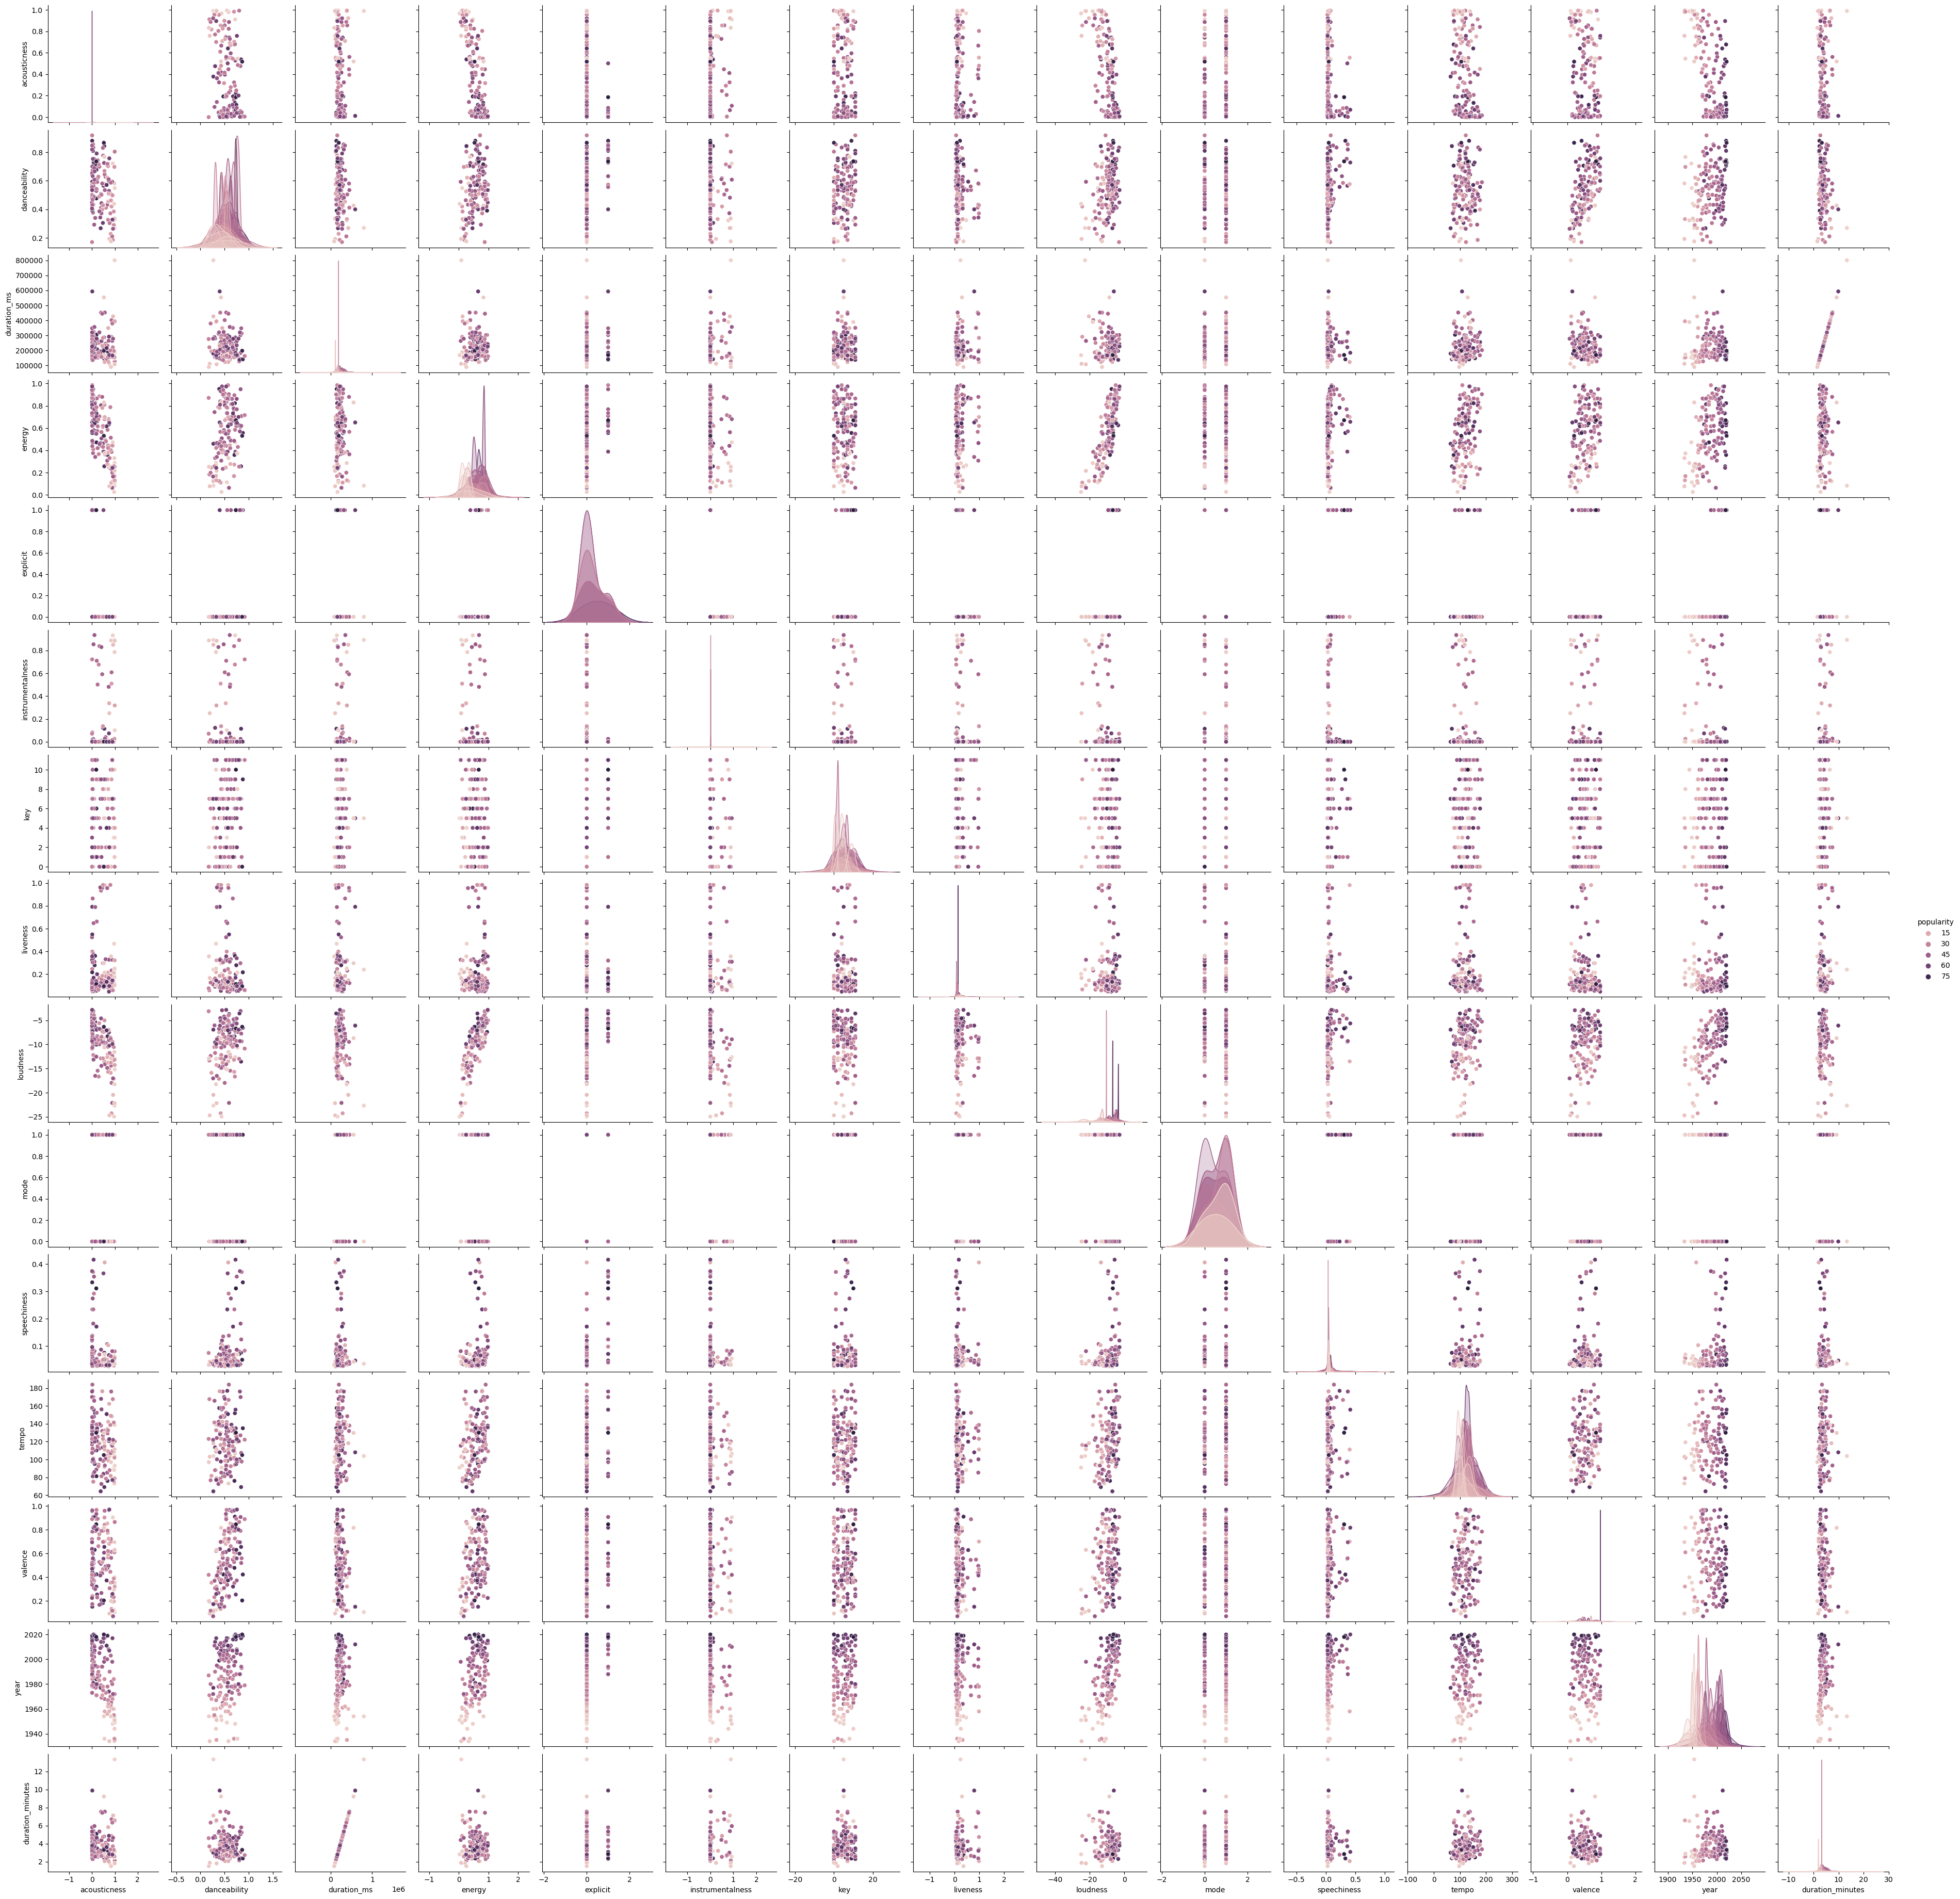

In [83]:
# muito demorado
sns.pairplot(data.sample(frac=0.001, random_state=2023), hue='popularity')

## Outliers

Acousticness

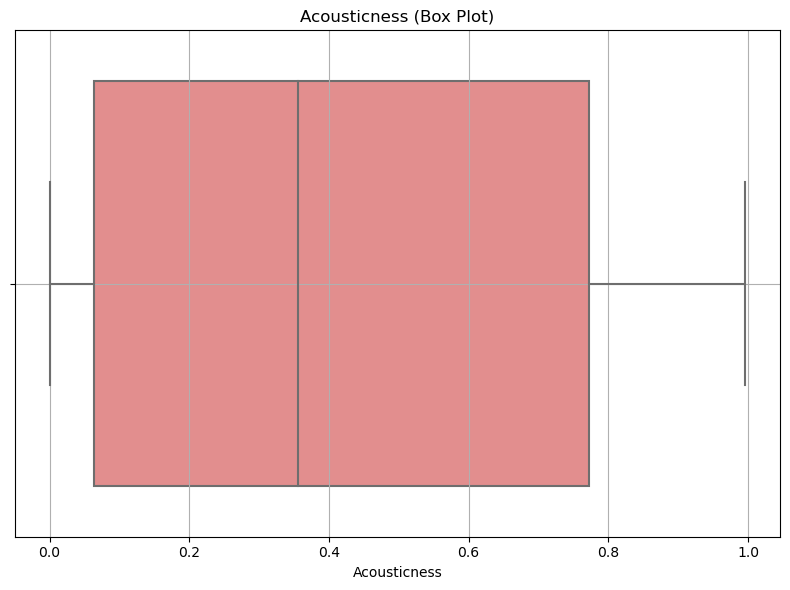

In [84]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['acousticness'], color='lightcoral')
    
plt.title('Acousticness (Box Plot)')
plt.xlabel('Acousticness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

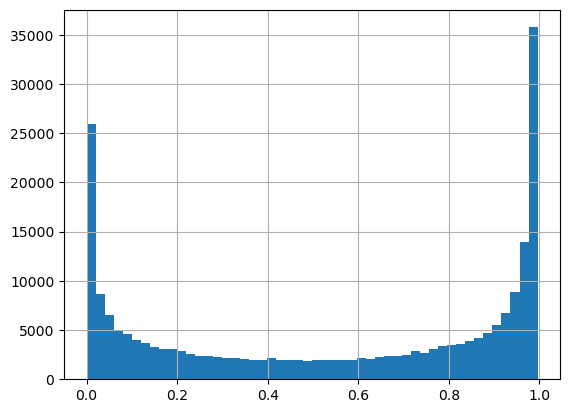

In [85]:
data_copy['acousticness'].hist(bins=50)

Danceabilidade

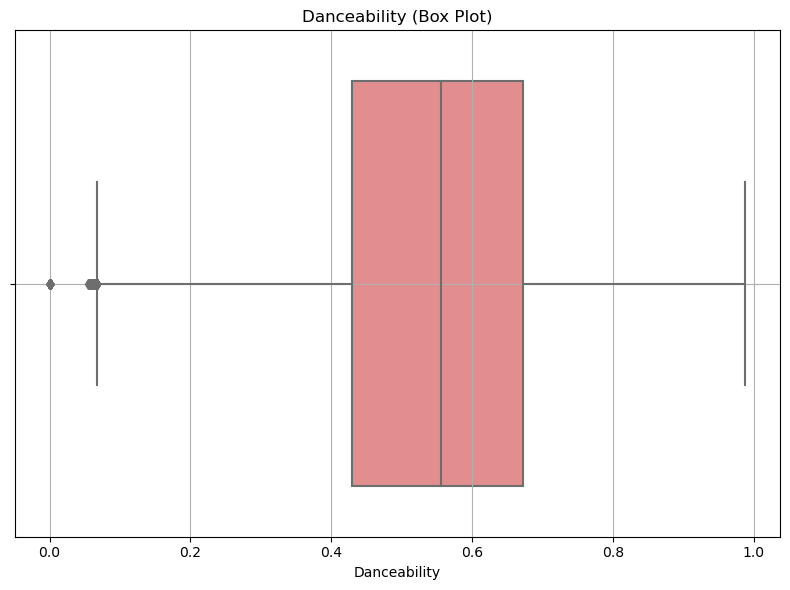

In [86]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['danceability'], color='lightcoral')
    
plt.title('Danceability (Box Plot)')
plt.xlabel('Danceability')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

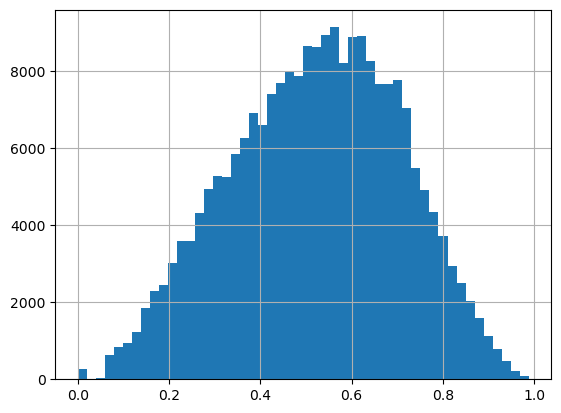

In [87]:
data_copy['danceability'].hist(bins=50)

Que músicas não têm danceabilidade?

In [88]:
data_copy[data_copy['danceability'] == 0]

acousticness                      artists  danceability  duration_ms  \
1269        0.976000               Richard Wagner           0.0       212667   
1269        0.976000                    Keilberth           0.0       212667   
1269        0.976000                       Varnay           0.0       212667   
1269        0.976000                       Lorenz           0.0       212667   
1269        0.976000                         Uhde           0.0       212667   
...              ...                          ...           ...          ...   
162730      0.951000  Columbia Symphony Orchestra           0.0        63373   
164201      0.862000                   Bill Cosby           0.0       215280   
169522      0.913000                     Granular           0.0       205161   
169743      0.000013                Naturaleza FX           0.0       150879   
169770      0.957000                     Granular           0.0       146061   

          energy  explicit  instrumentalness  key  liveness  loudness  mode  \
1269    0.085400         0          0.000105    7     0.343   -21.505     1   
1269    0.085400         0          0.000105    7     0.343   -21.505     1   
1269    0.085400         0          0.000105    7     0.343   -21.505     1   
1269    0.085400         0          0.000105    7     0.343   -21.505     1   
1269    0.085400         0          0.000105    7     0.343   -21.505     1   
...          ...       ...               ...  ...       ...       ...   ...   
162730  0.126000         0          0.689000    8     0.608   -16.260     1   
164201  0.770000         0          0.000002    9     0.694   -15.316     0   
169522  0.000164         0          0.910000   10     0.155   -31.221     0   
169743  0.000020         0          0.208000    1     0.311   -16.873     1   
169770  0.148000         0          0.168000    5     0.112   -22.012     1   

                                                     name  popularity  \
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...           0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...           0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...           0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...           0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...           0   
...                                                   ...         ...   
162730  L'Oiseau de feu: Dialogue de Kachtchei avec Iv...           0   
164201                                       Noah: Right!          16   
169522                               White Noise - 700 hz          64   
169743                                 Colors of the Rain          68   
169770                                Brown Noise 750 LPF          69   

        speechiness  tempo  valence  duration_minutes  release_date_year  \
1269            0.0    0.0      0.0          3.544450               1952   
1269            0.0    0.0      0.0          3.544450               1952   
1269            0.0    0.0      0.0          3.544450               1952   
1269            0.0    0.0      0.0          3.544450               1952   
1269            0.0    0.0      0.0          3.544450               1952   
...             ...    ...      ...               ...                ...   
162730          0.0    0.0      0.0          1.056217               1948   
164201          0.0    0.0      0.0          3.588000               1963   
169522          0.0    0.0      0.0          3.419350               2017   
169743          0.0    0.0      0.0          2.514650               2019   
169770          0.0    0.0      0.0          2.434350               2019   

        release_date_month  release_date_day  
1269                     1                 1  
1269                     1                 1  
1269                     1                 1  
1269                     1                 1  
1269                     1                 1  
...                    ...

Duration

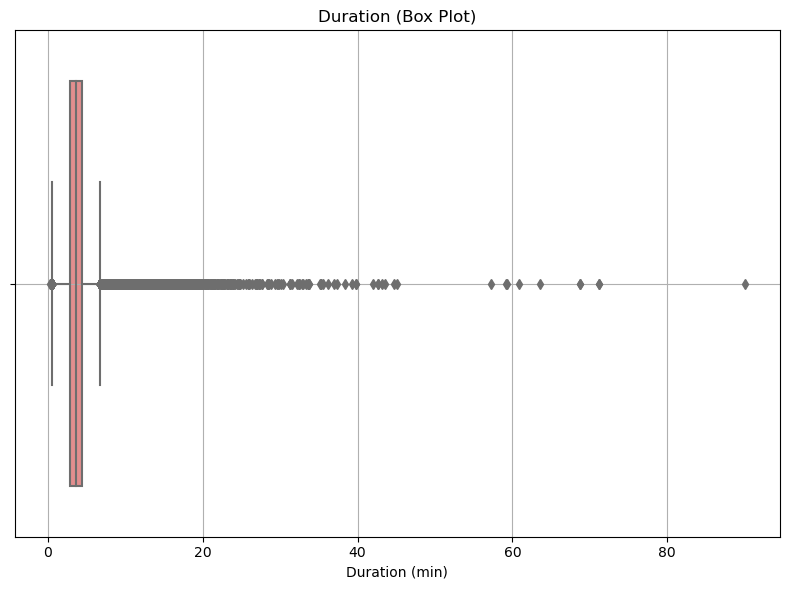

In [89]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['duration_minutes'], color='lightcoral')
    
plt.title('Duration (Box Plot)')
plt.xlabel('Duration (min)')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

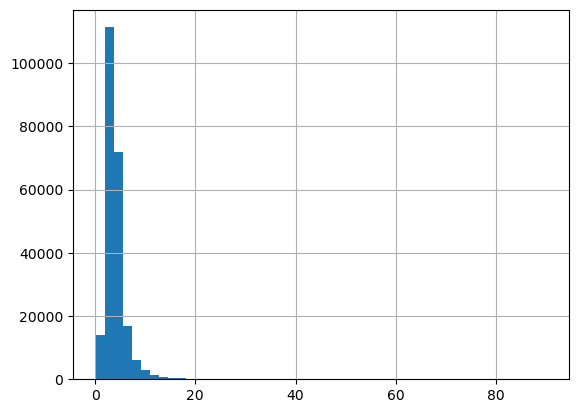

In [90]:
data_copy['duration_minutes'].hist(bins=50)

Energy

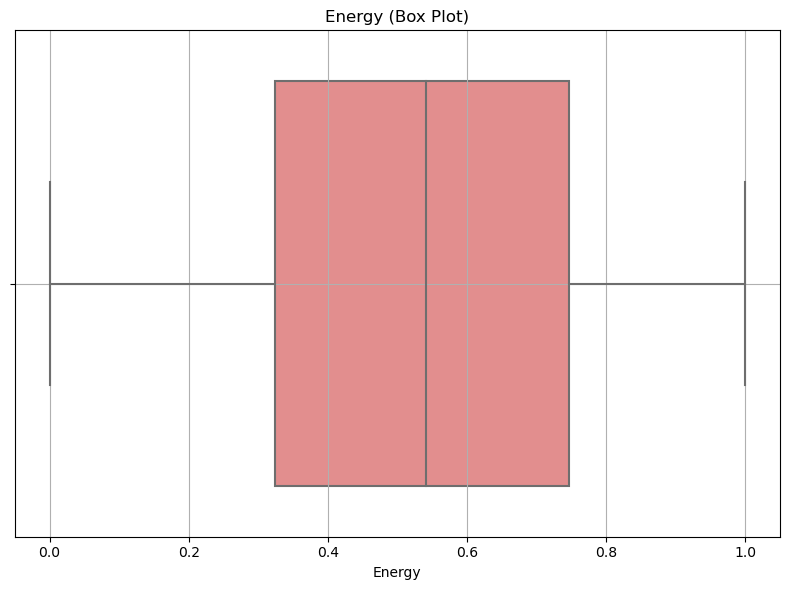

In [91]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['energy'], color='lightcoral')
    
plt.title('Energy (Box Plot)')
plt.xlabel('Energy')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

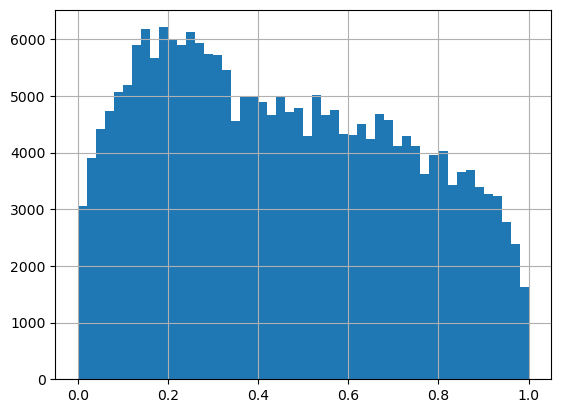

In [92]:
data_copy['energy'].hist(bins=50)

Instrumentalness

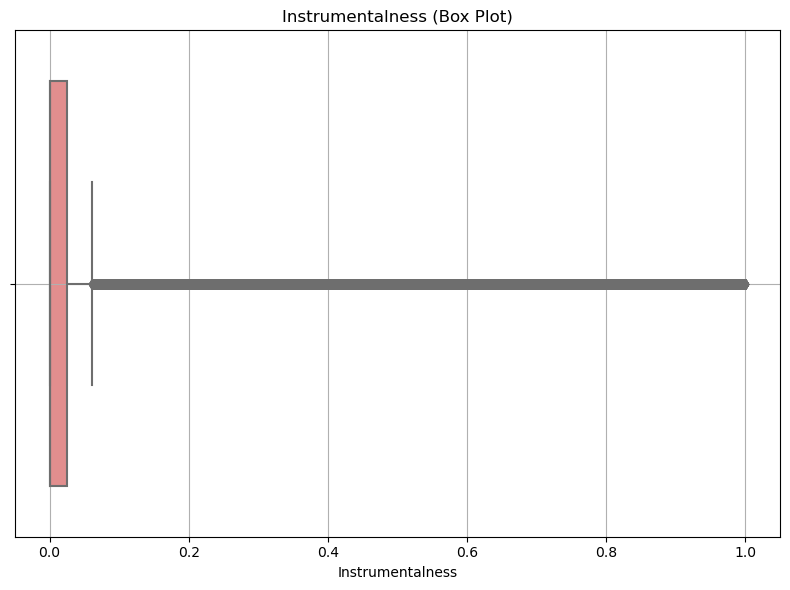

In [93]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['instrumentalness'], color='lightcoral')
    
plt.title('Instrumentalness (Box Plot)')
plt.xlabel('Instrumentalness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

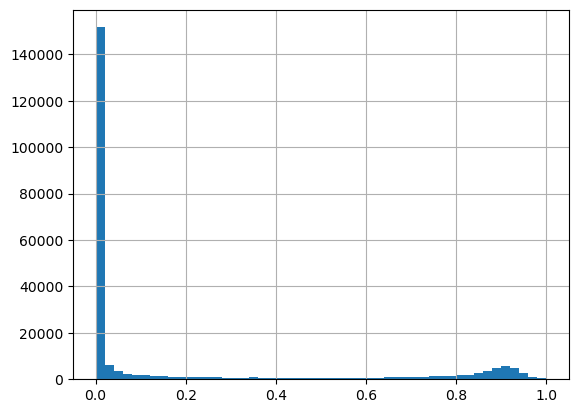

In [94]:
data_copy['instrumentalness'].hist(bins=50)

In [95]:
data_copy[data_copy['instrumentalness'] > 0.25].info()

<class 'pandas.core.frame.DataFrame'>
Index: 52466 entries, 0 to 169835
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acousticness        52466 non-null  float64
 1   artists             52466 non-null  object 
 2   danceability        52466 non-null  float64
 3   duration_ms         52466 non-null  int64  
 4   energy              52466 non-null  float64
 5   explicit            52466 non-null  int64  
 6   instrumentalness    52466 non-null  float64
 7   key                 52466 non-null  int64  
 8   liveness            52466 non-null  float64
 9   loudness            52466 non-null  float64
 10  mode                52466 non-null  int64  
 11  name                52466 non-null  object 
 12  popularity          52466 non-null  int64  
 13  speechiness         52466 non-null  float64
 14  tempo               52466 non-null  float64
 15  valence             52466 non-null  float64
 16  duration

Cerca de 1/5 das músicas tem um valor de instrumentalness superior a 0.25 (outlier)

Liveness

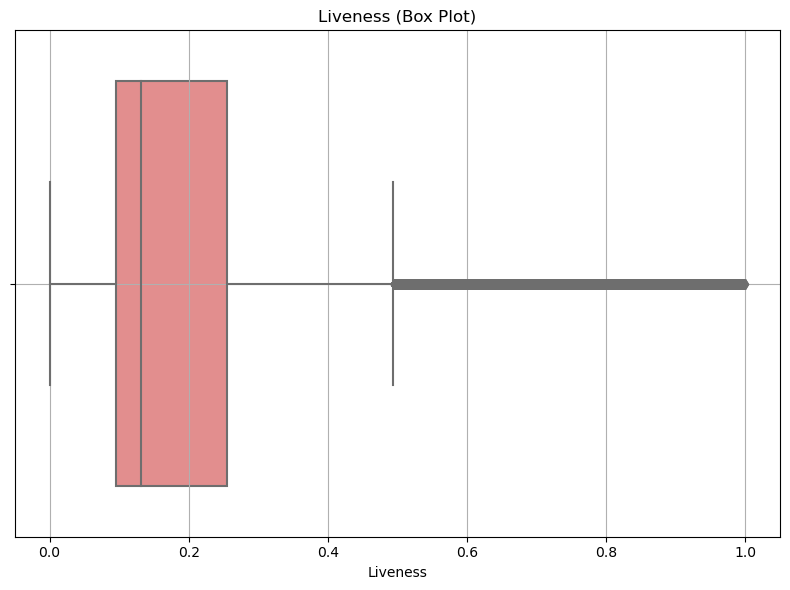

In [96]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['liveness'], color='lightcoral')
    
plt.title('Liveness (Box Plot)')
plt.xlabel('Liveness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

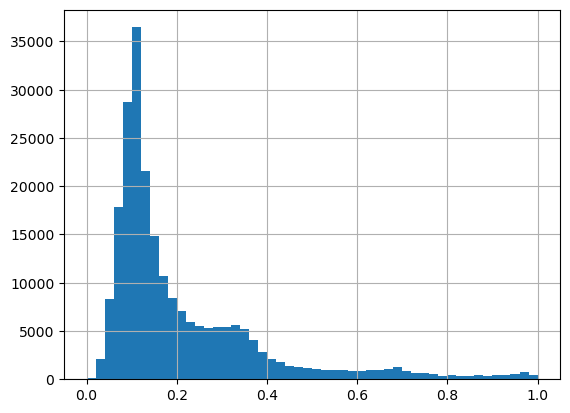

In [97]:
data_copy['liveness'].hist(bins=50)

Loudness

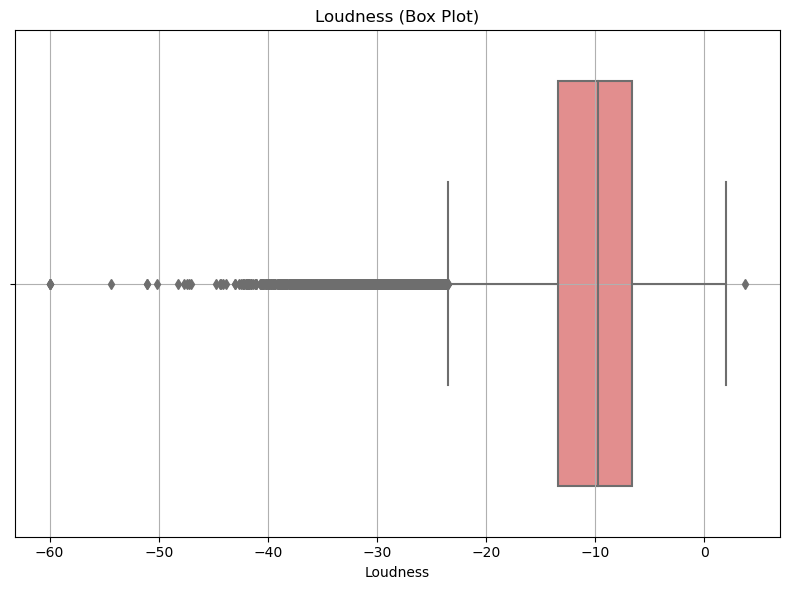

In [98]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['loudness'], color='lightcoral')
    
plt.title('Loudness (Box Plot)')
plt.xlabel('Loudness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

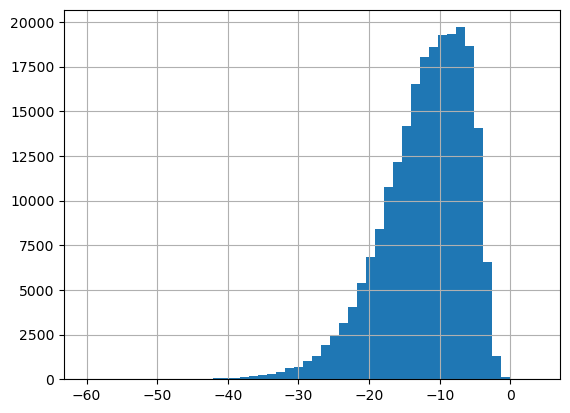

In [99]:
data_copy['loudness'].hist(bins=50)

Popularity

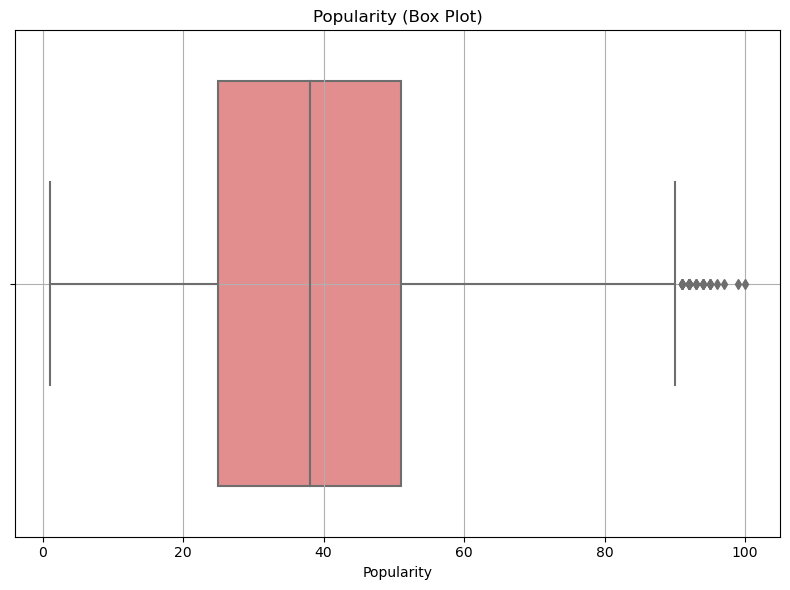

In [100]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['popularity'], color='lightcoral')
    
plt.title('Popularity (Box Plot)')
plt.xlabel('Popularity')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

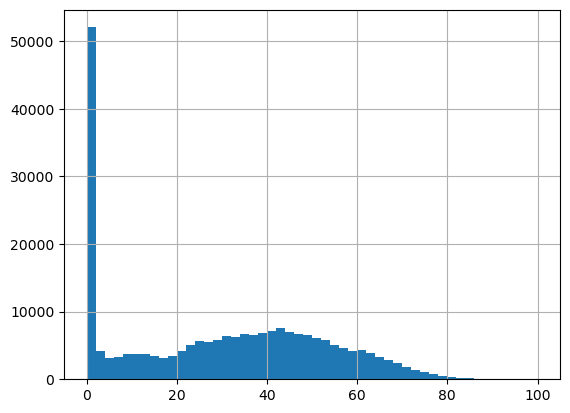

In [101]:
data_copy['popularity'].hist(bins=50)

Speechiness

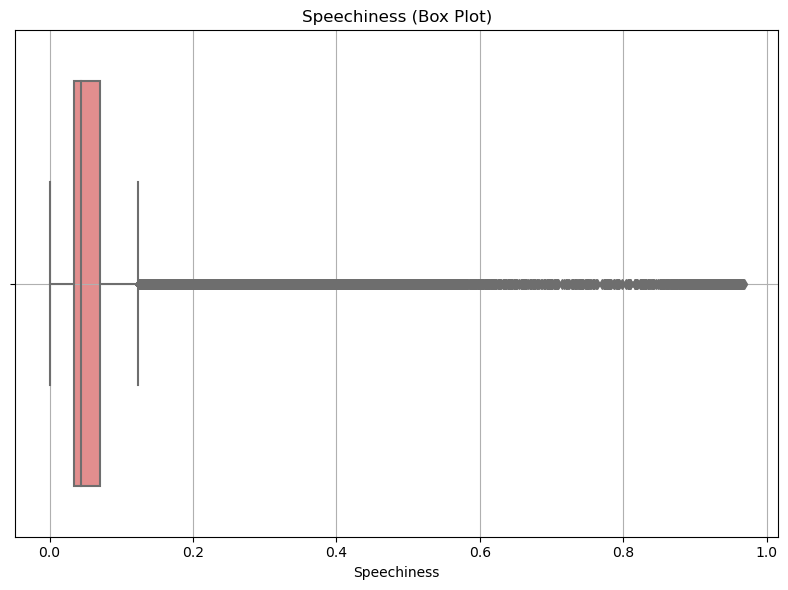

In [102]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['speechiness'], color='lightcoral')
    
plt.title('Speechiness (Box Plot)')
plt.xlabel('Speechiness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

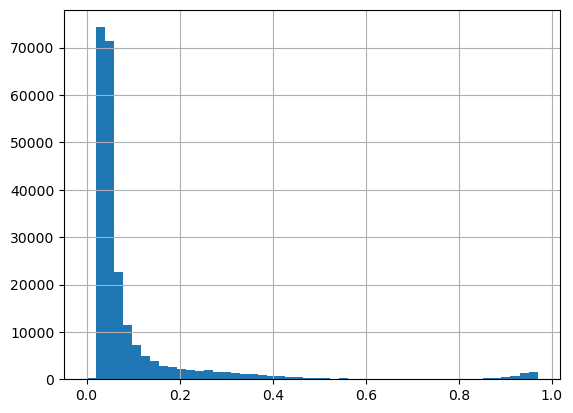

In [103]:
data_copy['speechiness'].hist(bins=50)

Tempo

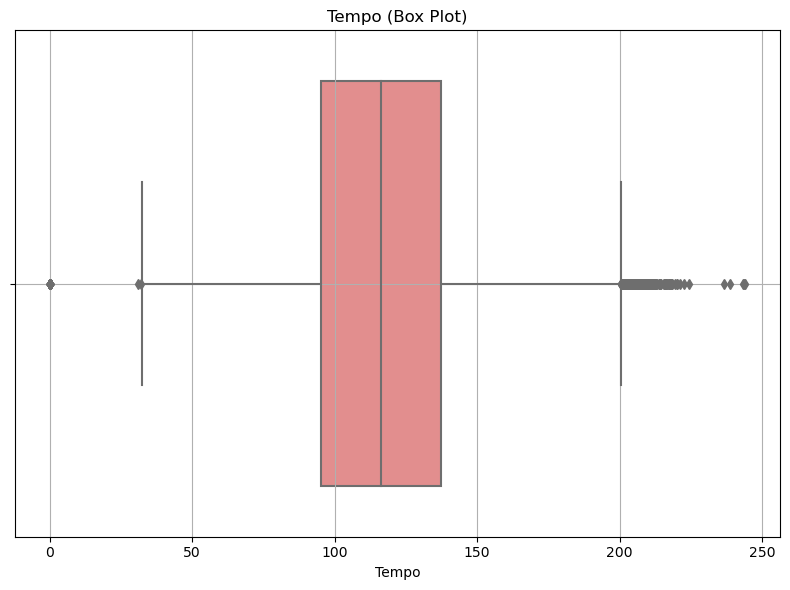

In [104]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['tempo'], color='lightcoral')
    
plt.title('Tempo (Box Plot)')
plt.xlabel('Tempo')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

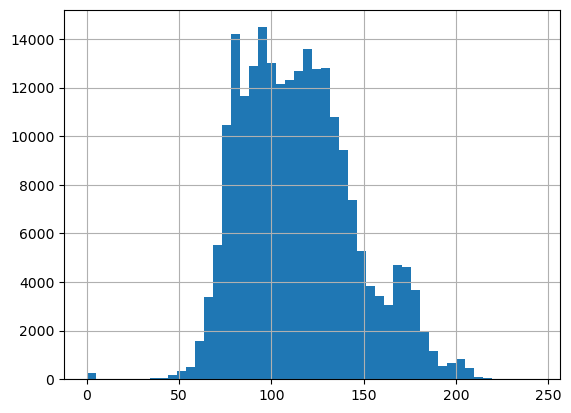

In [105]:
data_copy['tempo'].hist(bins=50)

Que músicas não tem ritmo?

In [106]:
data_copy[data_copy['tempo'] == 0]

acousticness                      artists  danceability  duration_ms  \
1269        0.976000               Richard Wagner           0.0       212667   
1269        0.976000                    Keilberth           0.0       212667   
1269        0.976000                       Varnay           0.0       212667   
1269        0.976000                       Lorenz           0.0       212667   
1269        0.976000                         Uhde           0.0       212667   
...              ...                          ...           ...          ...   
162730      0.951000  Columbia Symphony Orchestra           0.0        63373   
164201      0.862000                   Bill Cosby           0.0       215280   
169522      0.913000                     Granular           0.0       205161   
169743      0.000013                Naturaleza FX           0.0       150879   
169770      0.957000                     Granular           0.0       146061   

          energy  explicit  instrumentalness  key  liveness  loudness  mode  \
1269    0.085400         0          0.000105    7     0.343   -21.505     1   
1269    0.085400         0          0.000105    7     0.343   -21.505     1   
1269    0.085400         0          0.000105    7     0.343   -21.505     1   
1269    0.085400         0          0.000105    7     0.343   -21.505     1   
1269    0.085400         0          0.000105    7     0.343   -21.505     1   
...          ...       ...               ...  ...       ...       ...   ...   
162730  0.126000         0          0.689000    8     0.608   -16.260     1   
164201  0.770000         0          0.000002    9     0.694   -15.316     0   
169522  0.000164         0          0.910000   10     0.155   -31.221     0   
169743  0.000020         0          0.208000    1     0.311   -16.873     1   
169770  0.148000         0          0.168000    5     0.112   -22.012     1   

                                                     name  popularity  \
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...           0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...           0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...           0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...           0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...           0   
...                                                   ...         ...   
162730  L'Oiseau de feu: Dialogue de Kachtchei avec Iv...           0   
164201                                       Noah: Right!          16   
169522                               White Noise - 700 hz          64   
169743                                 Colors of the Rain          68   
169770                                Brown Noise 750 LPF          69   

        speechiness  tempo  valence  duration_minutes  release_date_year  \
1269            0.0    0.0      0.0          3.544450               1952   
1269            0.0    0.0      0.0          3.544450               1952   
1269            0.0    0.0      0.0          3.544450               1952   
1269            0.0    0.0      0.0          3.544450               1952   
1269            0.0    0.0      0.0          3.544450               1952   
...             ...    ...      ...               ...                ...   
162730          0.0    0.0      0.0          1.056217               1948   
164201          0.0    0.0      0.0          3.588000               1963   
169522          0.0    0.0      0.0          3.419350               2017   
169743          0.0    0.0      0.0          2.514650               2019   
169770          0.0    0.0      0.0          2.434350               2019   

        release_date_month  release_date_day  
1269                     1                 1  
1269                     1                 1  
1269                     1                 1  
1269                     1                 1  
1269                     1                 1  
...                    ...

Missing values?

Valence

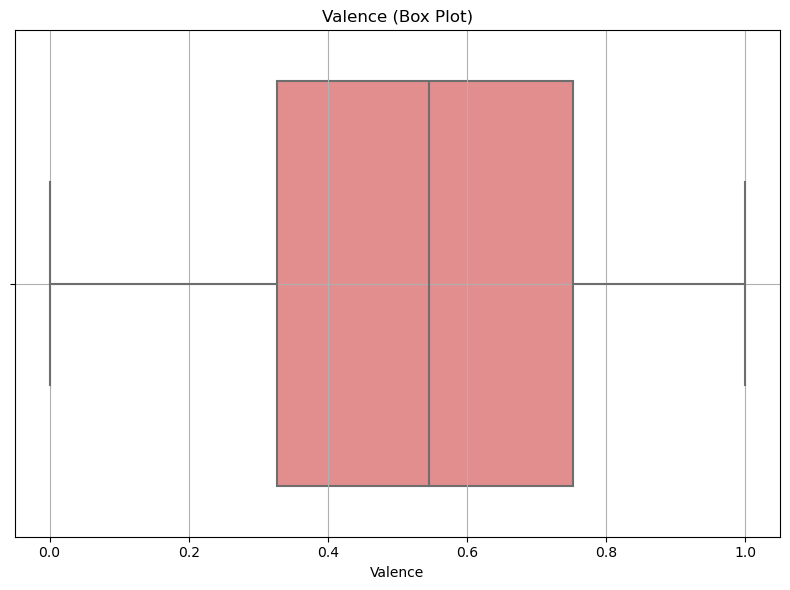

In [107]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['valence'], color='lightcoral')
    
plt.title('Valence (Box Plot)')
plt.xlabel('Valence')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

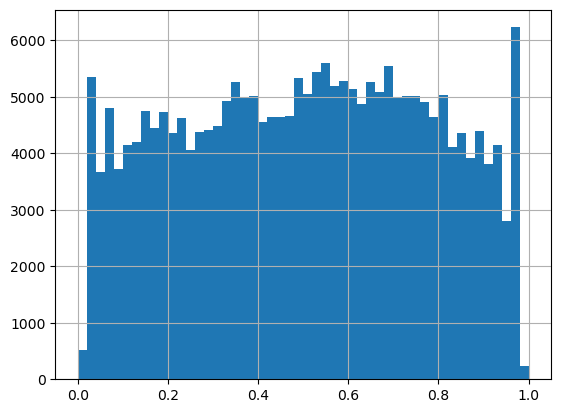

In [108]:
data_copy['valence'].hist(bins=50)

Que músicas não tem valência?

In [109]:
data_copy[data_copy['valence'] == 0]

acousticness                      artists  danceability  duration_ms  \
943         0.940000              Igor Stravinsky         0.182        25200   
943         0.940000  Columbia Symphony Orchestra         0.182        25200   
1269        0.976000               Richard Wagner         0.000       212667   
1269        0.976000                    Keilberth         0.000       212667   
1269        0.976000                       Varnay         0.000       212667   
...              ...                          ...           ...          ...   
164201      0.862000                   Bill Cosby         0.000       215280   
166088      0.293000                   Bad Brains         0.420        45000   
169522      0.913000                     Granular         0.000       205161   
169743      0.000013                Naturaleza FX         0.000       150879   
169770      0.957000                     Granular         0.000       146061   

          energy  explicit  instrumentalness  key  liveness  loudness  mode  \
943     0.000884         0          0.993000   10     0.082   -48.278     1   
943     0.000884         0          0.993000   10     0.082   -48.278     1   
1269    0.085400         0          0.000105    7     0.343   -21.505     1   
1269    0.085400         0          0.000105    7     0.343   -21.505     1   
1269    0.085400         0          0.000105    7     0.343   -21.505     1   
...          ...       ...               ...  ...       ...       ...   ...   
164201  0.770000         0          0.000002    9     0.694   -15.316     0   
166088  0.000281         0          0.442000    1     0.749   -15.637     1   
169522  0.000164         0          0.910000   10     0.155   -31.221     0   
169743  0.000020         0          0.208000    1     0.311   -16.873     1   
169770  0.148000         0          0.168000    5     0.112   -22.012     1   

                                                     name  popularity  \
943     Le sacre du printemps: Part 1 "Adoration of th...           0   
943     Le sacre du printemps: Part 1 "Adoration of th...           0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...           0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...           0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...           0   
...                                                   ...         ...   
164201                                       Noah: Right!          16   
166088                                              Intro          30   
169522                               White Noise - 700 hz          64   
169743                                 Colors of the Rain          68   
169770                                Brown Noise 750 LPF          69   

        speechiness    tempo  valence  duration_minutes  release_date_year  \
943          0.0604  118.462      0.0           0.42000               1948   
943          0.0604  118.462      0.0           0.42000               1948   
1269         0.0000    0.000      0.0           3.54445               1952   
1269         0.0000    0.000      0.0           3.54445               1952   
1269         0.0000    0.000      0.0           3.54445               1952   
...             ...      ...      ...               ...                ...   
164201       0.0000    0.000      0.0           3.58800               1963   
166088       0.3980   79.383      0.0           0.75000               1982   
169522       0.0000    0.000      0.0           3.41935               2017   
169743       0.0000    0.000      0.0           2.51465               2019   
169770       0.0000    0.000      0.0           2.43435               2019   

        release_date_month  release_date_day  
943                      1                 1  
943                      1                 1  
1269                     1                 1  
1269                     1                 1  
1269                     1                 1  
..

As mesmas 147 que não têm tempo nem danceabilidade + outras 38

### Aplicando binning

Energy

In [248]:
data_binned = data_copy.copy()
estimator = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_binned['energy_binned'] = estimator.fit_transform(data_copy[['energy']])
data_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226784 entries, 0 to 169908
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   acousticness        226784 non-null  float64
 1   artists             226784 non-null  object 
 2   danceability        226784 non-null  float64
 3   duration_ms         226784 non-null  int64  
 4   energy              226784 non-null  float64
 5   explicit            226784 non-null  int64  
 6   instrumentalness    226784 non-null  float64
 7   key                 226784 non-null  int64  
 8   liveness            226784 non-null  float64
 9   loudness            226784 non-null  float64
 10  mode                226784 non-null  int64  
 11  name                226784 non-null  object 
 12  popularity          226784 non-null  int64  
 13  speechiness         226784 non-null  float64
 14  tempo               226784 non-null  float64
 15  valence             226784 non-null  fl

/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


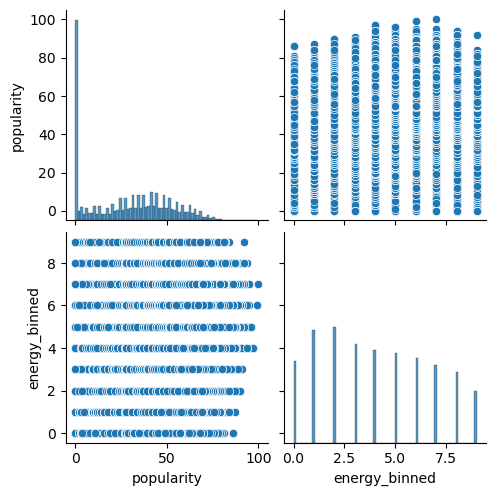

In [249]:
sns.pairplot(data_binned, vars=['popularity', 'energy_binned'])

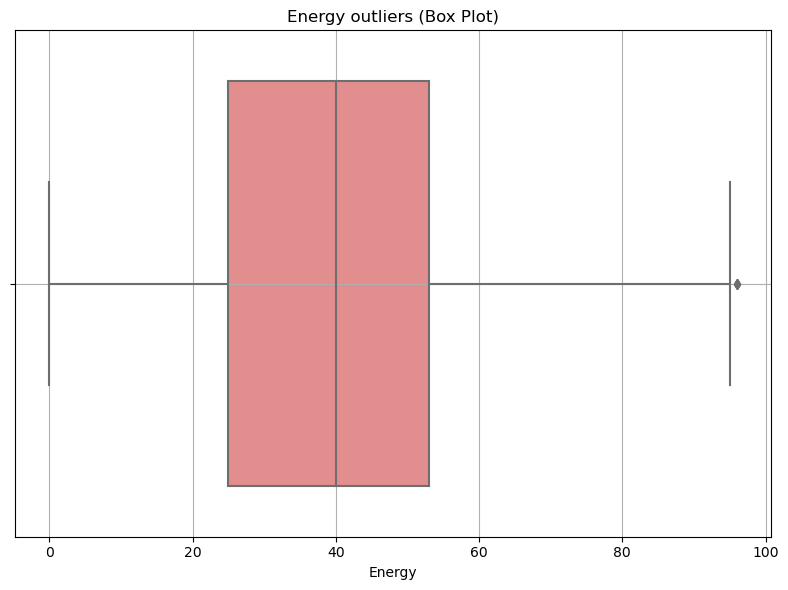

In [257]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_copy[(data_copy['energy'] < 0.6) & (data_copy['energy'] > 0.5)]['popularity'], color='lightcoral')
    
plt.title('Energy outliers (Box Plot)')
plt.xlabel('Energy')
    
plt.grid(True)
plt.tight_layout()
plt.show()

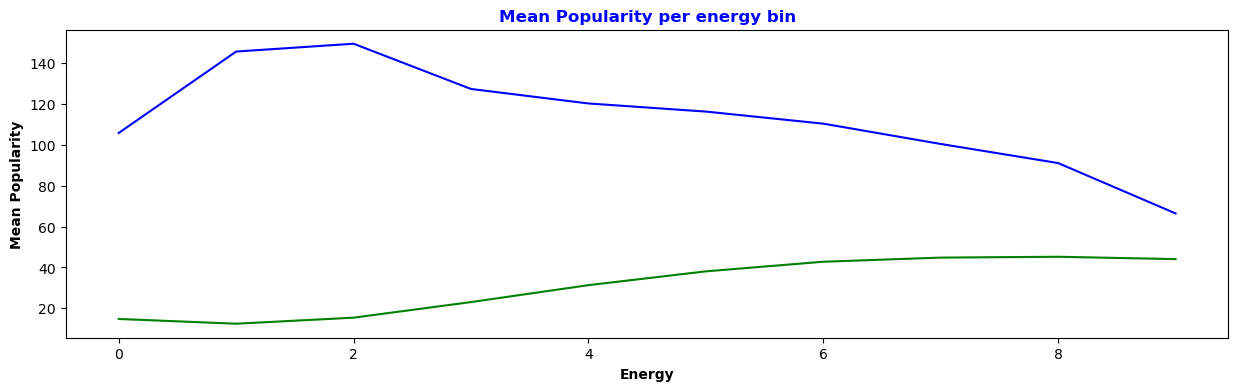

In [256]:
fig, ax = plt.subplots(figsize=(15, 4))
data_binned.groupby('energy_binned')['popularity'].mean().plot(color='green', ax=ax)
(data_binned.groupby('energy_binned')['popularity'].count()/200).plot(color='blue', ax=ax, label='Count')
ax.set_title('Mean Popularity per energy bin', c='blue', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Energy', weight='bold')
plt.show()

Acousticness

In [128]:
data_binned['acousticness_binned'] = estimator.fit_transform(data_binned[['acousticness']])
data_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226784 entries, 0 to 169908
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   acousticness         226784 non-null  float64
 1   artists              226784 non-null  object 
 2   danceability         226784 non-null  float64
 3   duration_ms          226784 non-null  int64  
 4   energy               226784 non-null  float64
 5   explicit             226784 non-null  int64  
 6   instrumentalness     226784 non-null  float64
 7   key                  226784 non-null  int64  
 8   liveness             226784 non-null  float64
 9   loudness             226784 non-null  float64
 10  mode                 226784 non-null  int64  
 11  name                 226784 non-null  object 
 12  popularity           226784 non-null  int64  
 13  speechiness          226784 non-null  float64
 14  tempo                226784 non-null  float64
 15  valence              2

/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


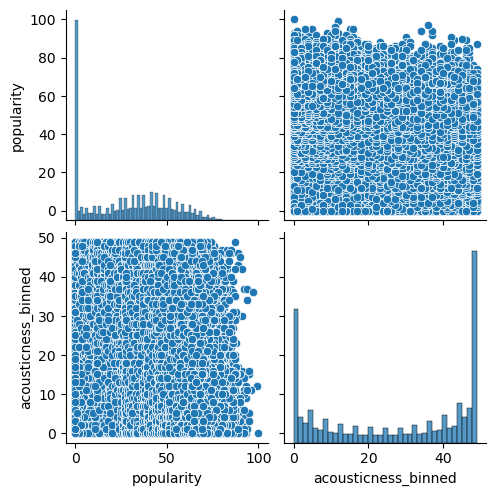

In [129]:
sns.pairplot(data_binned, vars=['popularity', 'acousticness_binned'])

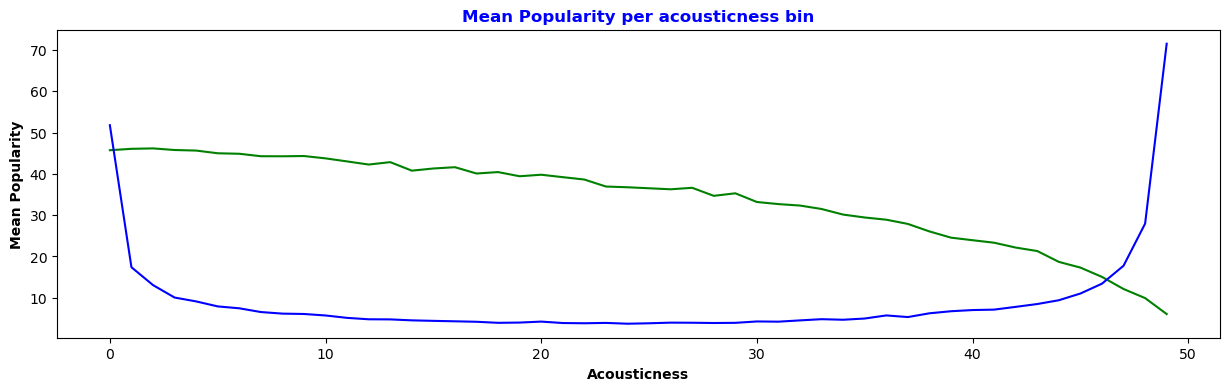

In [150]:
fig, ax = plt.subplots(figsize=(15, 4))
data_binned.groupby('acousticness_binned')['popularity'].mean().plot(color='green', ax=ax)
(data_binned.groupby('acousticness_binned')['popularity'].count()/500).plot(color='blue', ax=ax, label='Count')
ax.set_title('Mean Popularity per acousticness bin', c='blue', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Acousticness', weight='bold')
plt.show()

Loudness

In [131]:
data_binned['loudness_binned'] = estimator.fit_transform(data_binned[['loudness']])
data_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226784 entries, 0 to 169908
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   acousticness         226784 non-null  float64
 1   artists              226784 non-null  object 
 2   danceability         226784 non-null  float64
 3   duration_ms          226784 non-null  int64  
 4   energy               226784 non-null  float64
 5   explicit             226784 non-null  int64  
 6   instrumentalness     226784 non-null  float64
 7   key                  226784 non-null  int64  
 8   liveness             226784 non-null  float64
 9   loudness             226784 non-null  float64
 10  mode                 226784 non-null  int64  
 11  name                 226784 non-null  object 
 12  popularity           226784 non-null  int64  
 13  speechiness          226784 non-null  float64
 14  tempo                226784 non-null  float64
 15  valence              2

/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


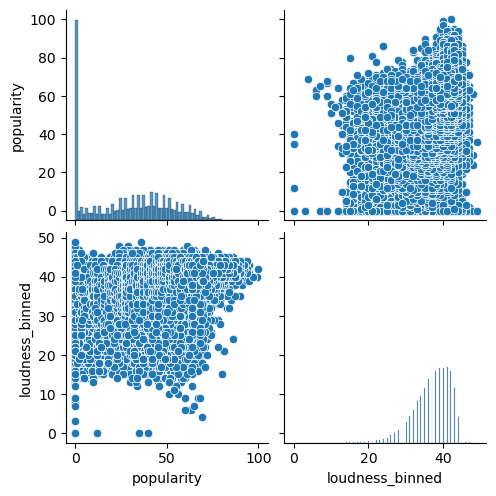

In [132]:
sns.pairplot(data_binned, vars=['popularity', 'loudness_binned'])

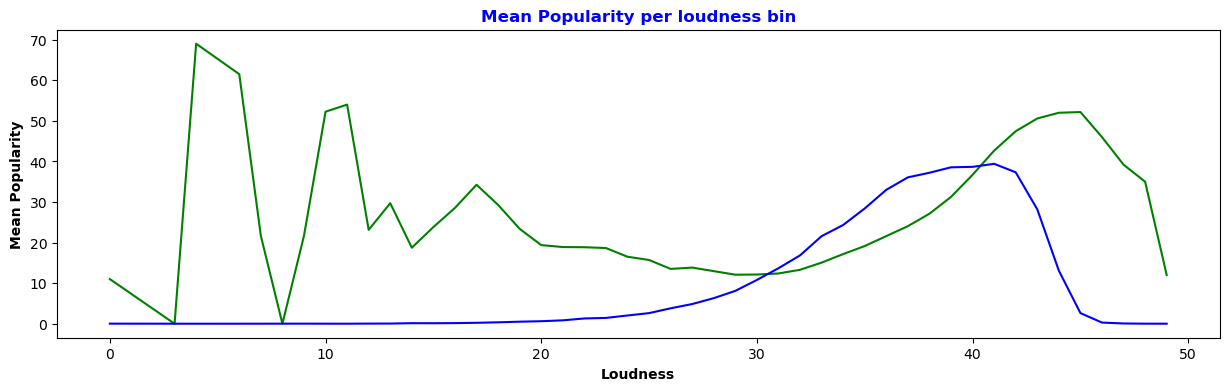

In [149]:
fig, ax = plt.subplots(figsize=(15, 4))
data_binned.groupby('loudness_binned')['popularity'].mean().plot(color='green', ax=ax)
(data_binned.groupby('loudness_binned')['popularity'].count()/500).plot(color='blue', ax=ax, label='Count')
ax.set_title('Mean Popularity per loudness bin', c='blue', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Loudness', weight='bold')
plt.show()

Instrumentalness

In [134]:
data_binned['instrumentalness_binned'] = estimator.fit_transform(data_binned[['instrumentalness']])
data_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226784 entries, 0 to 169908
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   acousticness             226784 non-null  float64
 1   artists                  226784 non-null  object 
 2   danceability             226784 non-null  float64
 3   duration_ms              226784 non-null  int64  
 4   energy                   226784 non-null  float64
 5   explicit                 226784 non-null  int64  
 6   instrumentalness         226784 non-null  float64
 7   key                      226784 non-null  int64  
 8   liveness                 226784 non-null  float64
 9   loudness                 226784 non-null  float64
 10  mode                     226784 non-null  int64  
 11  name                     226784 non-null  object 
 12  popularity               226784 non-null  int64  
 13  speechiness              226784 non-null  float64
 14  tempo    

/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


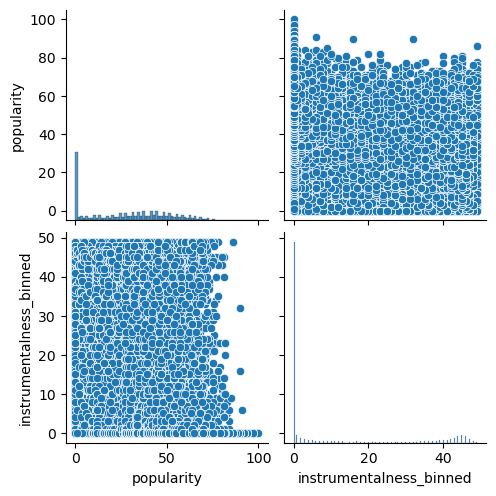

In [135]:
sns.pairplot(data_binned, vars=['popularity', 'instrumentalness_binned'])

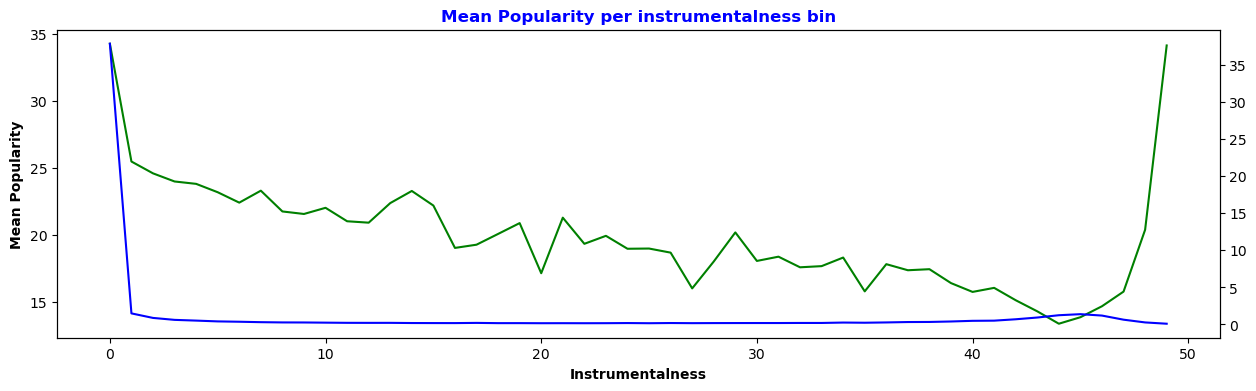

In [144]:
fig, ax = plt.subplots(figsize=(15, 4))
data_binned.groupby('instrumentalness_binned')['popularity'].mean().plot(color='green', ax=ax)
(data_binned.groupby('instrumentalness_binned')['popularity'].count()/4000).plot(color='blue', ax=ax, label='Count')
ax.set_title('Mean Popularity per instrumentalness bin', c='blue', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Instrumentalness', weight='bold')
plt.show()

Duration Minutes

In [153]:
data_binned['duration_binned'] = estimator.fit_transform(data_binned[['duration_minutes']])
data_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226784 entries, 0 to 169908
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   acousticness             226784 non-null  float64
 1   artists                  226784 non-null  object 
 2   danceability             226784 non-null  float64
 3   duration_ms              226784 non-null  int64  
 4   energy                   226784 non-null  float64
 5   explicit                 226784 non-null  int64  
 6   instrumentalness         226784 non-null  float64
 7   key                      226784 non-null  int64  
 8   liveness                 226784 non-null  float64
 9   loudness                 226784 non-null  float64
 10  mode                     226784 non-null  int64  
 11  name                     226784 non-null  object 
 12  popularity               226784 non-null  int64  
 13  speechiness              226784 non-null  float64
 14  tempo    

/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


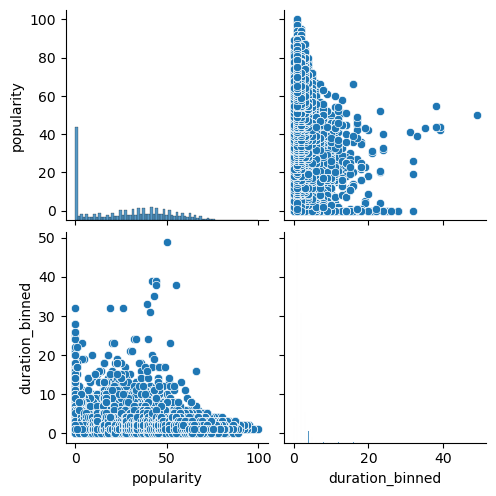

In [154]:
sns.pairplot(data_binned, vars=['popularity', 'duration_binned'])

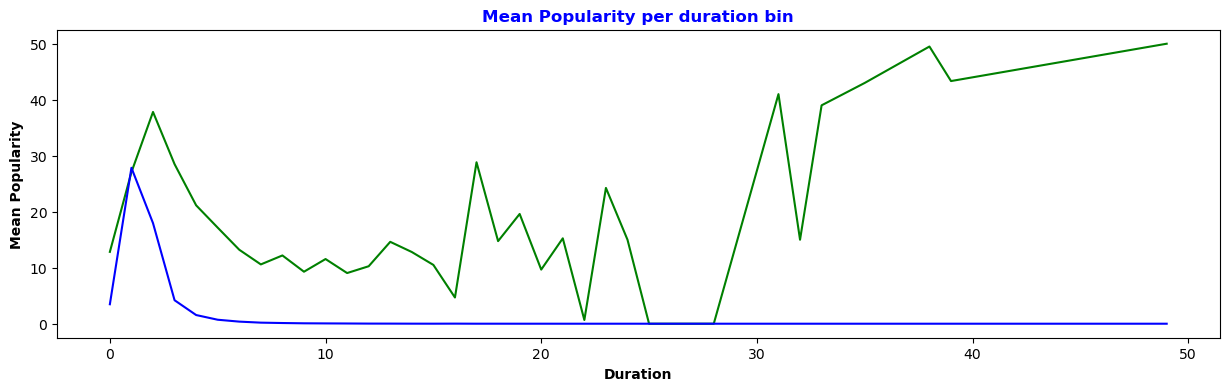

In [155]:
fig, ax = plt.subplots(figsize=(15, 4))
data_binned.groupby('duration_binned')['popularity'].mean().plot(color='green', ax=ax)
(data_binned.groupby('duration_binned')['popularity'].count()/4000).plot(color='blue', ax=ax, label='Count')
ax.set_title('Mean Popularity per duration bin', c='blue', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Duration', weight='bold')
plt.show()

In [261]:
data_copy[data_copy['duration_minutes'] > 30].sort_values(by=['popularity'], ascending=False).to_csv('long_songs.csv', index=False)